In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Predicting Insurance Claim Amount

# Dataset Description

The dataset contains insurance details of different policies in the US and personal information of insurance customers. The dataset can be used to analyse the relationship of insurance claim amount with various factors, it can also be used to predict insurance claim amounts using a machine learning model.

In [219]:
df = pd.read_csv("insurance_claim.csv",parse_dates=["Effective To Date"])
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2011-02-24,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,2011-01-31,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2011-02-19,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,2011-01-20,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2011-02-03,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [220]:
df.shape

(9134, 26)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   Country                        9134 non-null   object        
 2   State Code                     9134 non-null   object        
 3   State                          9134 non-null   object        
 4   Claim Amount                   9134 non-null   float64       
 5   Response                       9134 non-null   object        
 6   Coverage                       9134 non-null   object        
 7   Education                      9134 non-null   object        
 8   Effective To Date              9134 non-null   datetime64[ns]
 9   EmploymentStatus               9134 non-null   object        
 10  Gender                         9134 non-null   object        
 11  Income           

Let's look at the distribution of all features

In [222]:
df["Customer"].nunique()

9134

Let's drop the unique customer ID as it does not provide any analytical info

In [223]:
df.drop("Customer",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Country                        9134 non-null   object        
 1   State Code                     9134 non-null   object        
 2   State                          9134 non-null   object        
 3   Claim Amount                   9134 non-null   float64       
 4   Response                       9134 non-null   object        
 5   Coverage                       9134 non-null   object        
 6   Education                      9134 non-null   object        
 7   Effective To Date              9134 non-null   datetime64[ns]
 8   EmploymentStatus               9134 non-null   object        
 9   Gender                         9134 non-null   object        
 10  Income                         9134 non-null   int64         
 11  Location Code    

In [224]:
df["Country"].value_counts()

US    9134
Name: Country, dtype: int64

Let's drop the Country column as it does not provide any analytical info

In [225]:
df.drop("Country",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   State Code                     9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Claim Amount                   9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   object        
 11  Marital Status   

In [226]:
df["State Code"].value_counts()

MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64

In [227]:
df["State"].value_counts()

Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64

The State Code & State columns contain the same info so let's drop the former

In [228]:
df.drop("State Code",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   State                          9134 non-null   object        
 1   Claim Amount                   9134 non-null   float64       
 2   Response                       9134 non-null   object        
 3   Coverage                       9134 non-null   object        
 4   Education                      9134 non-null   object        
 5   Effective To Date              9134 non-null   datetime64[ns]
 6   EmploymentStatus               9134 non-null   object        
 7   Gender                         9134 non-null   object        
 8   Income                         9134 non-null   int64         
 9   Location Code                  9134 non-null   object        
 10  Marital Status                 9134 non-null   object        
 11  Monthly Premium A

Text(0.5, 1.0, 'Number of claims as per State')

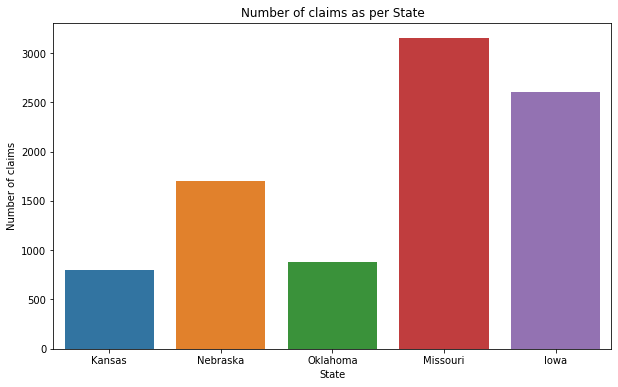

In [229]:
plt.figure(figsize=(10,6))
sns.countplot(df["State"])
plt.ylabel('Number of claims')
plt.title('Number of claims as per State')

Highest number of claims have been received from Missouri followed by Iowa

Text(0.5, 1.0, 'Claim Amount - Distplot')

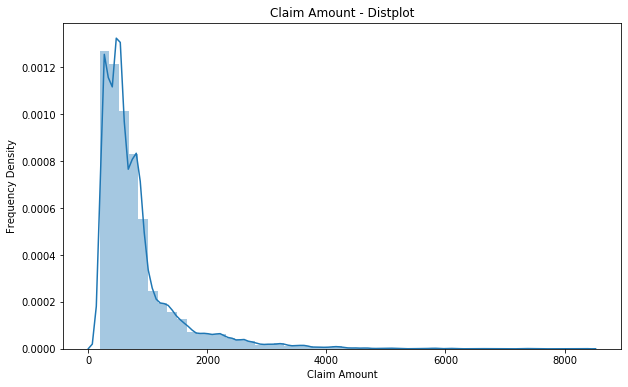

In [230]:
plt.figure(figsize=(10,6))
sns.distplot(df["Claim Amount"])
#plt.xticks(rotation = 90)
plt.xlabel('Claim Amount')
plt.ylabel('Frequency Density')
plt.title('Claim Amount - Distplot')

The distribution of claim amount is skewed to the right

No     7826
Yes    1308
Name: Response, dtype: int64

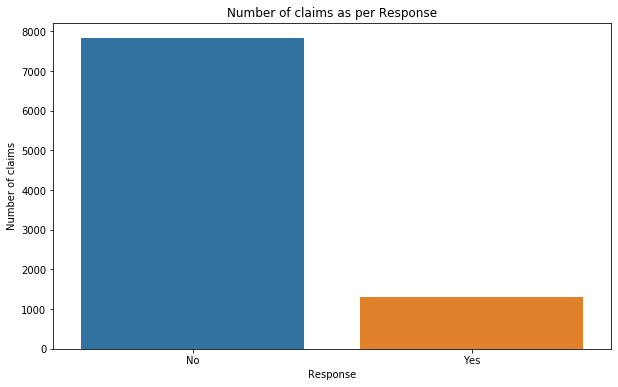

In [231]:
plt.figure(figsize=(10,6))
sns.countplot(df["Response"])
plt.ylabel('Number of claims')
plt.title('Number of claims as per Response')
df["Response"].value_counts()

Out of the 9134 claims filed, only 1308 claims received response from the insurer

Text(0.5, 1.0, 'Number of claims as per Coverage')

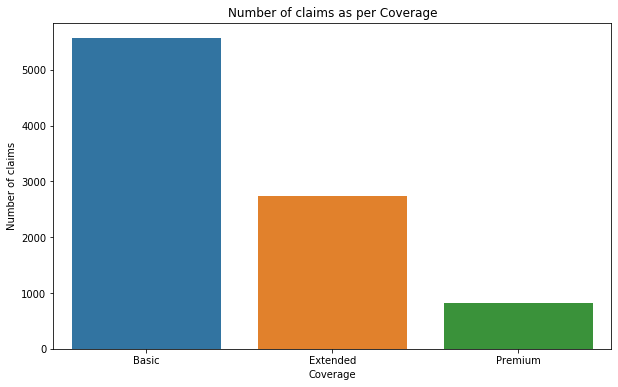

In [232]:
plt.figure(figsize=(10,6))
sns.countplot(df["Coverage"])
plt.ylabel('Number of claims')
plt.title('Number of claims as per Coverage')

Most of the claims belong to basic insurance coverage followed by extended coverage, the least have premium coverage

Text(0.5, 1.0, 'Number of claimant as per Education')

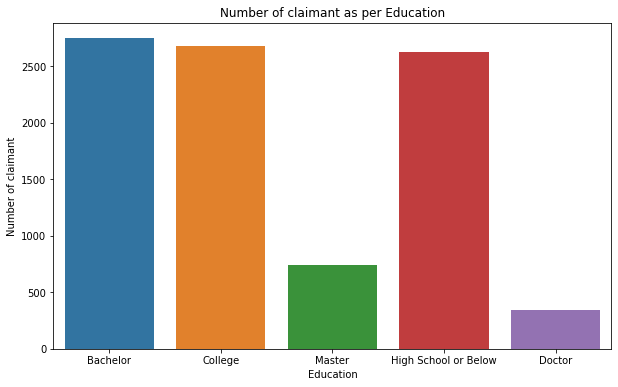

In [233]:
plt.figure(figsize=(10,6))
sns.countplot(df["Education"])
plt.ylabel('Number of claimant')
plt.title('Number of claimant as per Education')

Most of the claimant are Bachelors followed by college educated, High school or below in order

In [234]:
df["Effective To Date"].nunique()

59

In [235]:
df["Effective To Date"].max()

Timestamp('2011-02-28 00:00:00')

In [236]:
df["Effective To Date"].min()

Timestamp('2011-01-01 00:00:00')

The effective to date has no analytical relationship with insurance claim amount so let's drop it

In [237]:
df.drop("Effective To Date",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Claim Amount                   9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

Text(0.5, 1.0, 'Number of claimant as per Employment Status')

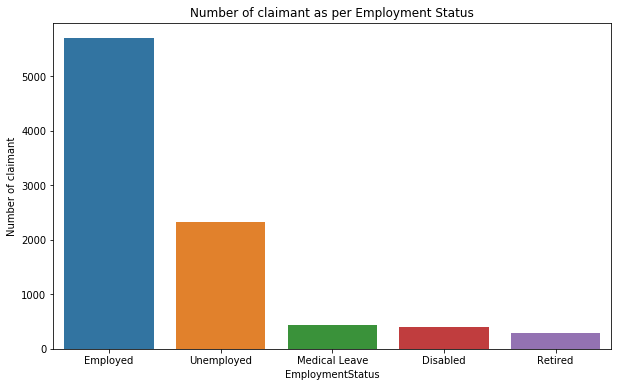

In [238]:
plt.figure(figsize=(10,6))
sns.countplot(df["EmploymentStatus"])
plt.ylabel('Number of claimant')
plt.title('Number of claimant as per Employment Status')

Majority of the insurance claimants are employed

Text(0.5, 1.0, 'Number of claimants as per Gender')

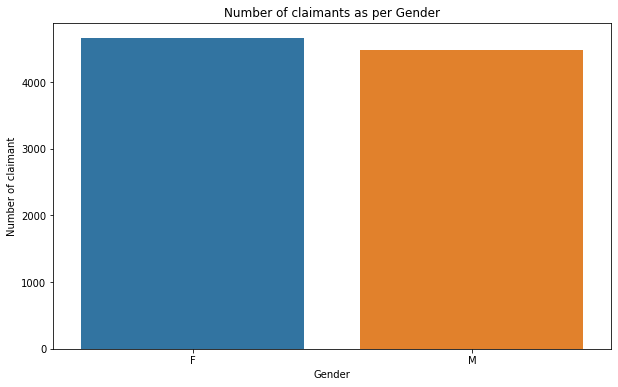

In [239]:
plt.figure(figsize=(10,6))
sns.countplot(df["Gender"])
plt.ylabel('Number of claimant')
plt.title('Number of claimants as per Gender')

The number of male and female claimants is almost the same

Text(0.5, 1.0, 'Income - Distplot')

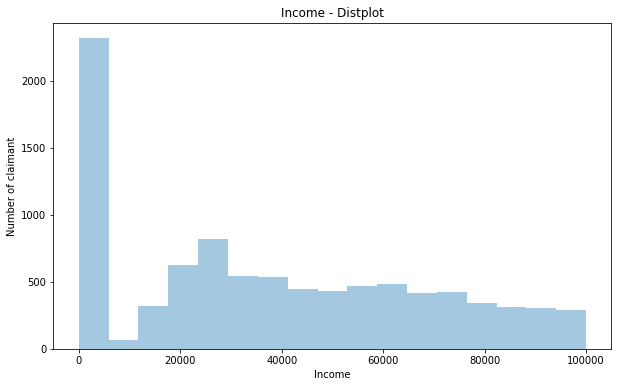

In [240]:
plt.figure(figsize=(10,6))
sns.distplot(df["Income"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('Income')
plt.ylabel('Number of claimant')
plt.title('Income - Distplot')

More than 2000 claimant out of 9134 have zero income, the distribution is highly skewed to the right

Text(0.5, 1.0, 'Number of claims as per Location Type')

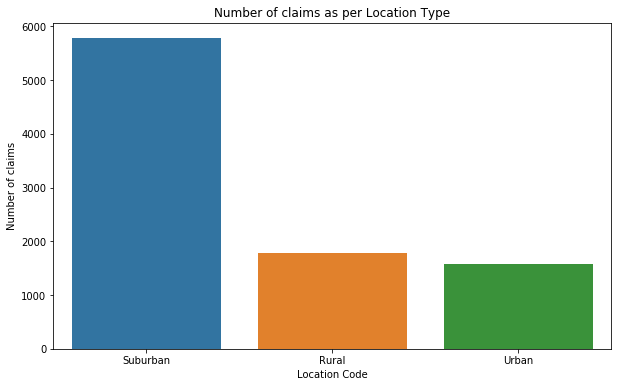

In [241]:
plt.figure(figsize=(10,6))
sns.countplot(df["Location Code"])
plt.ylabel('Number of claims')
plt.title('Number of claims as per Location Type')

Majority of the insurance claims are from Suburban areas

Text(0.5, 1.0, 'Number of claimant as per Marital Status')

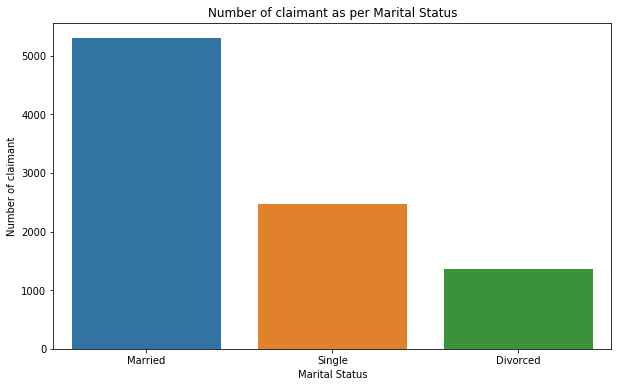

In [242]:
plt.figure(figsize=(10,6))
sns.countplot(df["Marital Status"])
plt.ylabel('Number of claimant')
plt.title('Number of claimant as per Marital Status')

Majority of the insurance claimant are married

Text(0.5, 1.0, 'Monthly Premium Auto - Distplot')

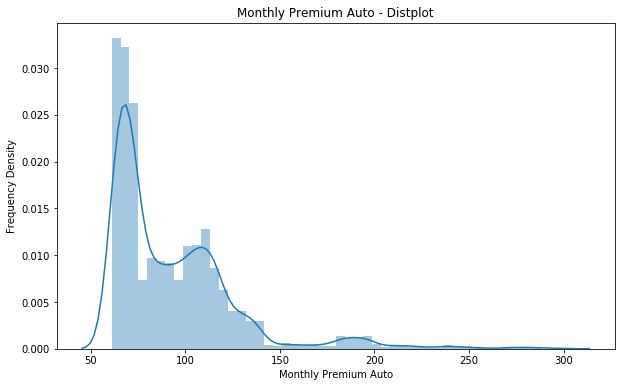

In [243]:
plt.figure(figsize=(10,6))
sns.distplot(df["Monthly Premium Auto"])
#plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('Monthly Premium Auto - Distplot')

The distribution of monthly premium is highly skewed to the right

Text(0.5, 1.0, 'Months Since Last Claim - Distplot')

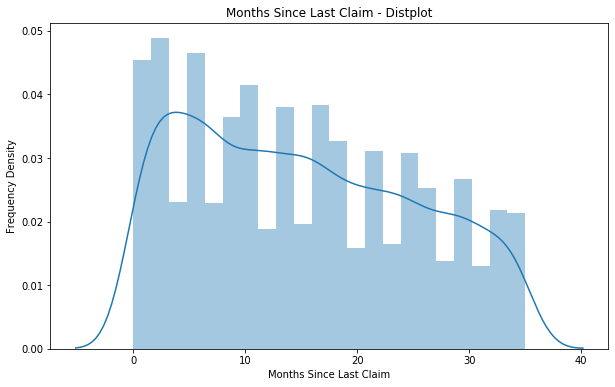

In [244]:
plt.figure(figsize=(10,6))
sns.distplot(df["Months Since Last Claim"])
#plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('Months Since Last Claim - Distplot')

The above distribution is skewed to the right

Text(0.5, 1.0, 'Months Since Policy Inception - Distplot')

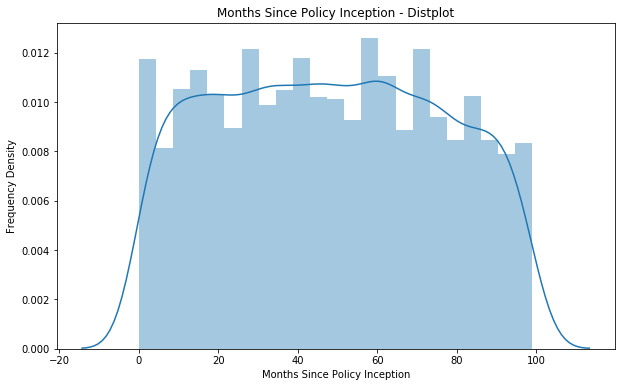

In [245]:
plt.figure(figsize=(10,6))
sns.distplot(df["Months Since Policy Inception"])
#plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('Months Since Policy Inception - Distplot')

Most of the policies are relatively new

Text(0.5, 1.0, 'Number of Open Complaints - Distplot')

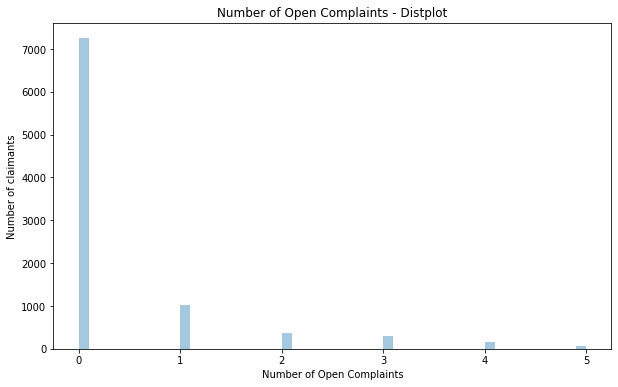

In [246]:
plt.figure(figsize=(10,6))
sns.distplot(df["Number of Open Complaints"],kde=False)
#plt.xticks(rotation = 90)
plt.ylabel('Number of claimants')
plt.title('Number of Open Complaints - Distplot')

Out of 9134 claimaints, more than 7000 don't have any open complaints

Text(0.5, 1.0, 'Number of Policies - Distplot')

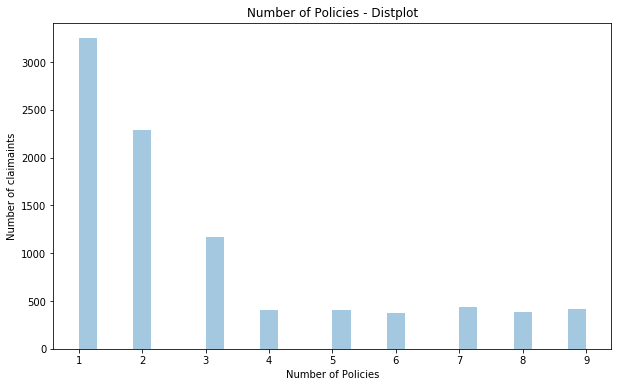

In [247]:
plt.figure(figsize=(10,6))
sns.distplot(df["Number of Policies"],kde=False)
#plt.xticks(rotation = 90)
plt.ylabel('Number of claimaints')
plt.title('Number of Policies - Distplot')

Majority of the claimaints have 1-3 number of policies

Text(0.5, 1.0, 'Number of claimaints as per Policy Type')

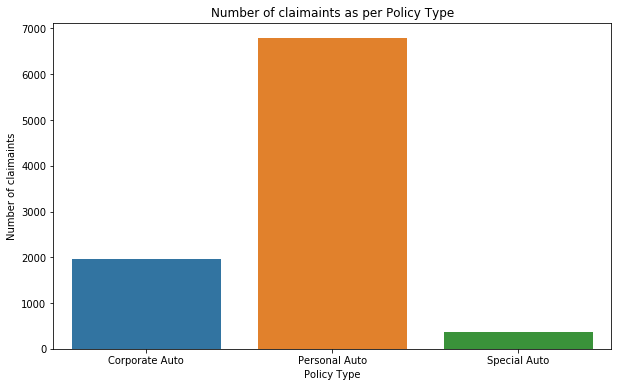

In [248]:
plt.figure(figsize=(10,6))
sns.countplot(df["Policy Type"])
plt.ylabel('Number of claimaints')
plt.title('Number of claimaints as per Policy Type')

Majority of the claimaints have personal auto policy type and the least have Spcial auto

Text(0.5, 1.0, 'Number of claimaints as per Policy')

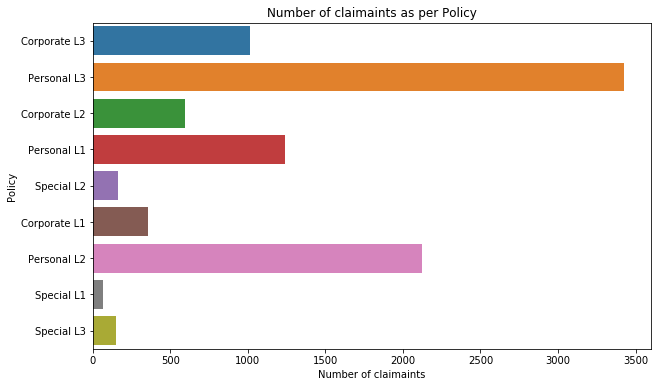

In [249]:
plt.figure(figsize=(10,6))
sns.countplot(y=df["Policy"])
plt.xlabel('Number of claimaints')
plt.title('Number of claimaints as per Policy')

Most of the claimaints have Personal L3 policy followed by Personal L2, very few customers have special L1 policy

Text(0.5, 1.0, 'Number of claimaints as per Claim Reason')

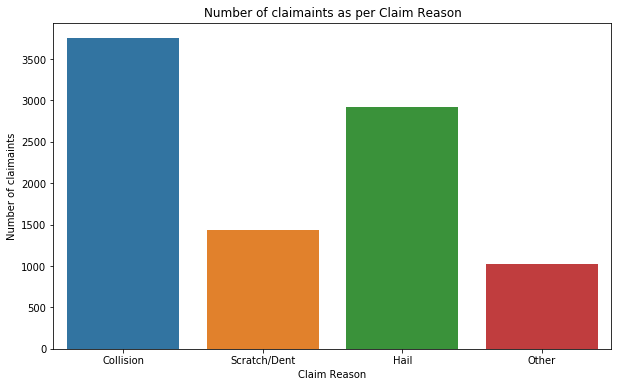

In [250]:
plt.figure(figsize=(10,6))
sns.countplot(df["Claim Reason"])
plt.ylabel('Number of claimaints')
plt.title('Number of claimaints as per Claim Reason')

The most common reason for insurance claim is Collision followed by Hail

Text(0.5, 1.0, 'Number of cases as per Sales Channel')

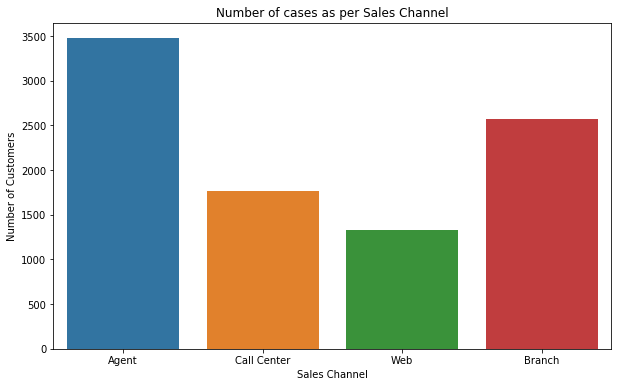

In [251]:
plt.figure(figsize=(10,6))
sns.countplot(df["Sales Channel"])
plt.ylabel('Number of Customers')
plt.title('Number of cases as per Sales Channel')

Most of the claimaints bought the insurance policies through Agents followed by directly through Branch

Text(0.5, 1.0, 'Total Claim Amount - Distplot')

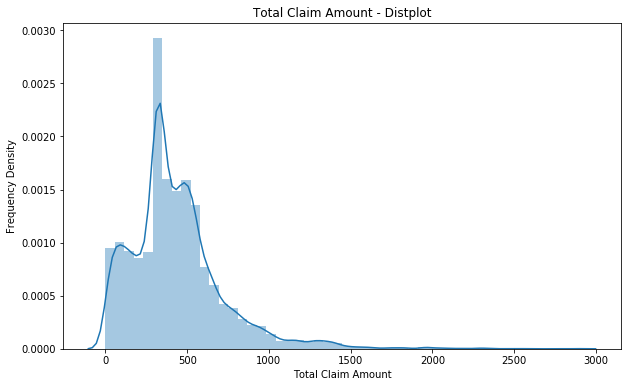

In [252]:
plt.figure(figsize=(10,6))
sns.distplot(df["Total Claim Amount"])
#plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('Total Claim Amount - Distplot')

The distribution of total claim amount is skewed to the right

Text(0.5, 1.0, 'Number of claimaints as per Vehicle Class')

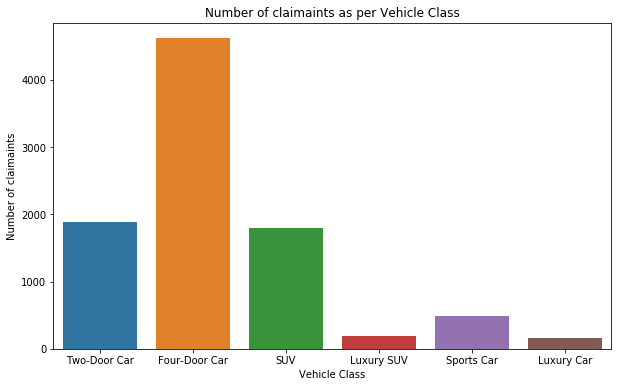

In [253]:
plt.figure(figsize=(10,6))
sns.countplot(df["Vehicle Class"])
plt.ylabel('Number of claimaints')
plt.title('Number of claimaints as per Vehicle Class')

Most of the insurance claim cases are for Four Door Car and very few cases belong to Luxury Car and Luxury SUV

Text(0.5, 1.0, 'Number of claimaints as per Vehicle Size')

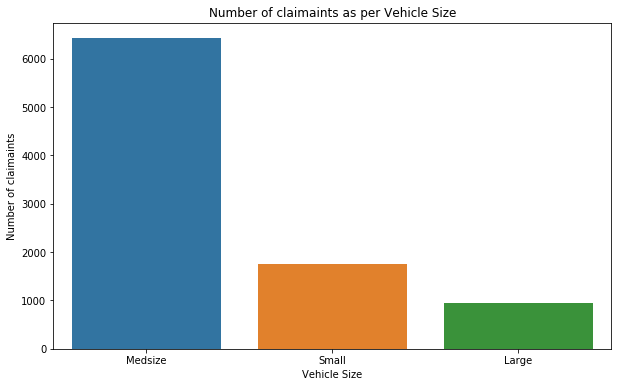

In [254]:
plt.figure(figsize=(10,6))
sns.countplot(df["Vehicle Size"])
plt.ylabel('Number of claimaints')
plt.title('Number of claimaints as per Vehicle Size')

Most of the insurance claim cases are for Medsize vehicles and the least for Large sized

Bivariate analysis: let's look at the relationship of claim amount with other features in the dataset

Text(0.5, 1.0, 'State vs Claim Amount - Boxplot')

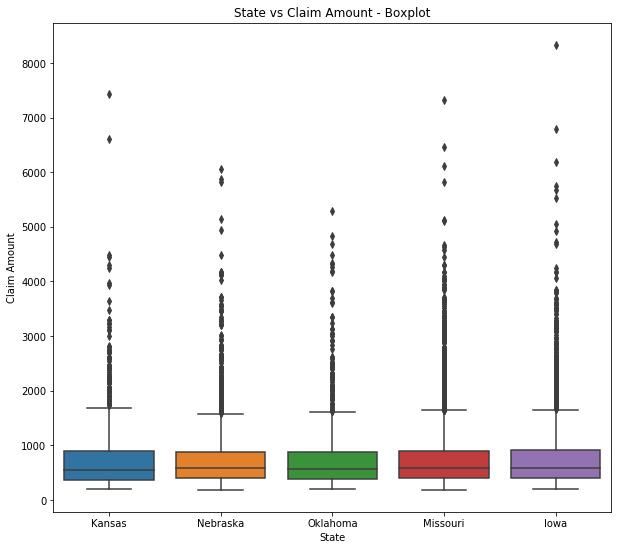

In [255]:
plt.figure(figsize=(10,9))
sns.boxplot(x="State", y="Claim Amount",data=df)
plt.title('State vs Claim Amount - Boxplot')

The claim amount has no relationship with state

Text(0.5, 1.0, 'Response vs Claim Amount - Boxplot')

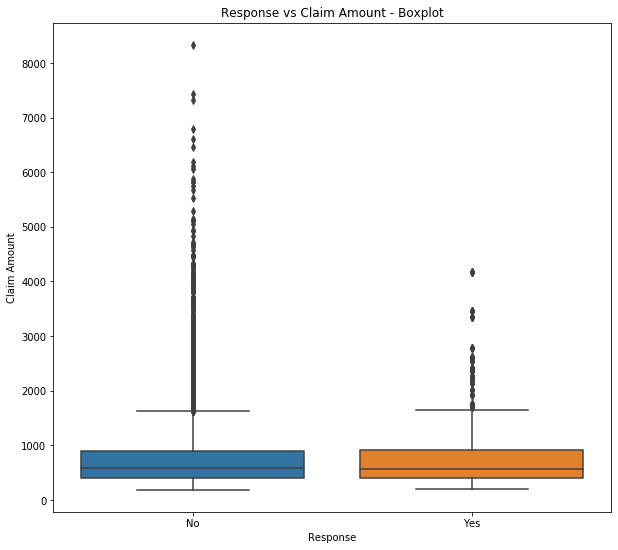

In [256]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Response", y="Claim Amount",data=df)
plt.title('Response vs Claim Amount - Boxplot')

Most of the higher outlying claim amounts didn't receive any response from the insurer

Text(0.5, 1.0, 'Coverage vs Claim Amount - Boxplot')

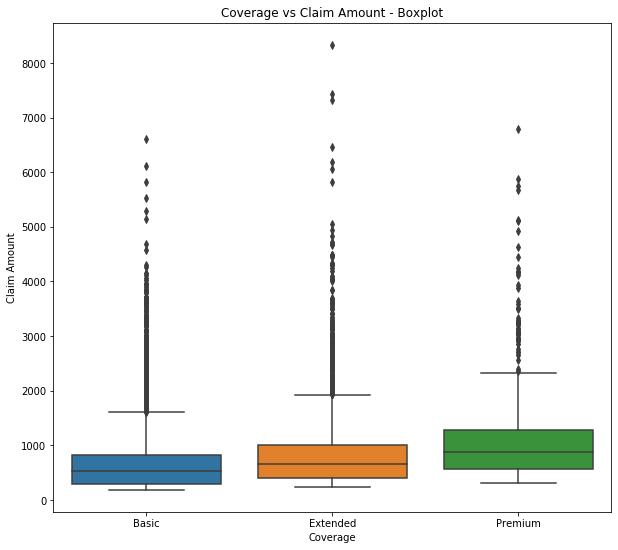

In [257]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Coverage", y="Claim Amount",data=df)
plt.title('Coverage vs Claim Amount - Boxplot')

Basic coverage has the minimum median claims followed by Extended coverage, premium coverage has the highest median claim amount

Text(0.5, 1.0, 'Education vs Claim Amount - Boxplot')

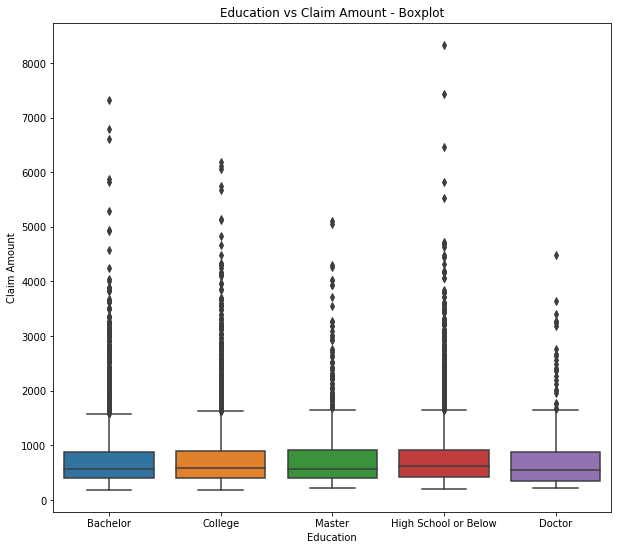

In [258]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Education", y="Claim Amount",data=df)
plt.title('Education vs Claim Amount - Boxplot')

Claim amount has no relationship with education level of claimant

Text(0.5, 1.0, 'Employment Status vs Claim Amount - Boxplot')

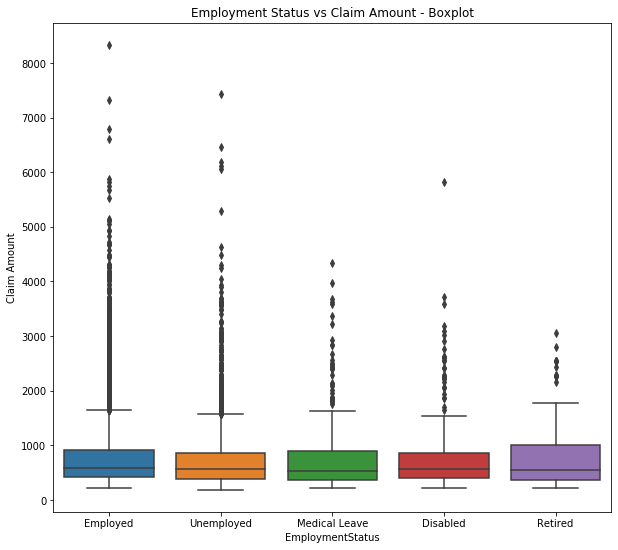

In [259]:
plt.figure(figsize=(10,9))
sns.boxplot(x="EmploymentStatus", y="Claim Amount",data=df)
plt.title('Employment Status vs Claim Amount - Boxplot')

Claim amount has no relationship with employment status of claimant

Text(0.5, 1.0, 'Gender vs Claim Amount - Boxplot')

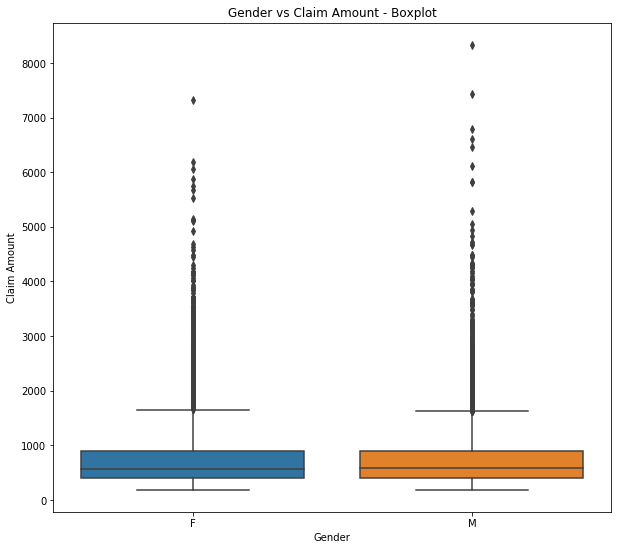

In [260]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Gender", y="Claim Amount",data=df)
plt.title('Gender vs Claim Amount - Boxplot')

Claim Amount does not depend on gender

Text(0.5, 1.0, 'Location Code vs Claim Amount - Boxplot')

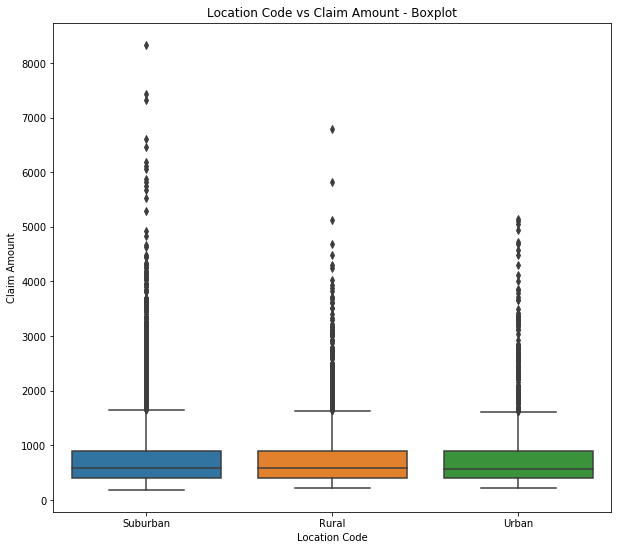

In [261]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Location Code", y="Claim Amount",data=df)
plt.title('Location Code vs Claim Amount - Boxplot')

Claim Amount does not depend on the area 

Text(0.5, 1.0, 'Marital Status vs Claim Amount - Boxplot')

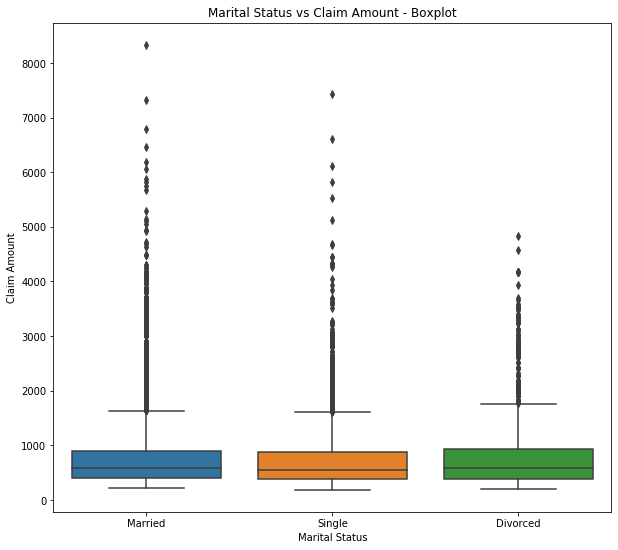

In [262]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Marital Status", y="Claim Amount",data=df)
plt.title('Marital Status vs Claim Amount - Boxplot')

Claim amount does not depend on marital status

Text(0.5, 1.0, 'Policy Type vs Claim Amount - Boxplot')

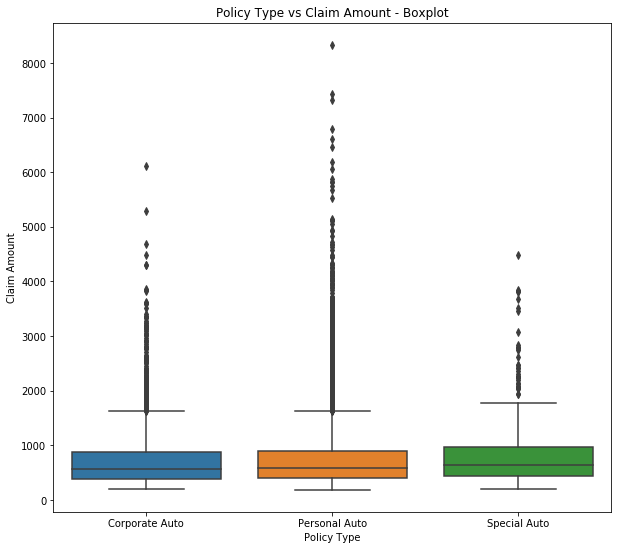

In [263]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Policy Type", y="Claim Amount",data=df)
plt.title('Policy Type vs Claim Amount - Boxplot')

Median claim was slightly higher for Special Auto policy type

Text(0.5, 1.0, 'Policy vs Claim Amount - Boxplot')

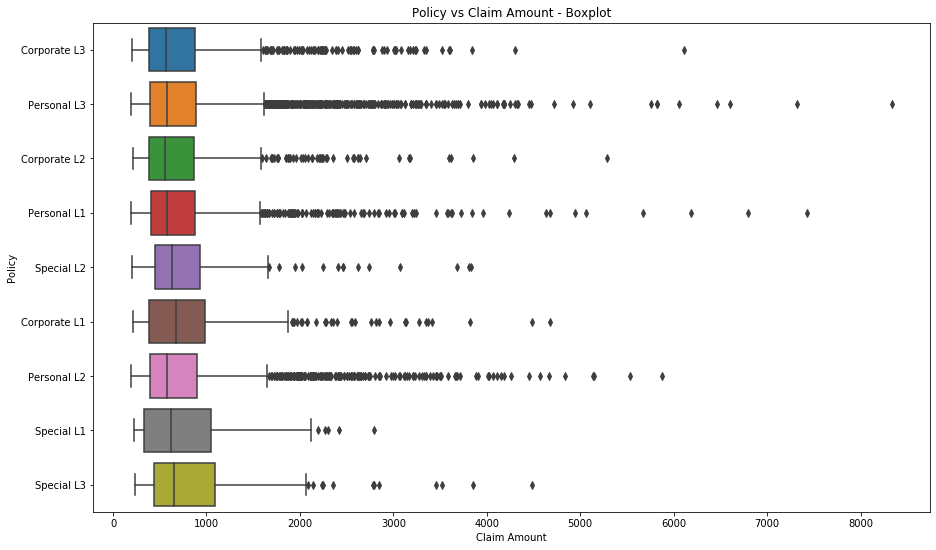

In [264]:
plt.figure(figsize=(15,9))
sns.boxplot(y="Policy", x="Claim Amount",data=df)
plt.title('Policy vs Claim Amount - Boxplot')

Median claims are different for different policy classes

Text(0.5, 1.0, 'Claim Reason vs Claim Amount - Boxplot')

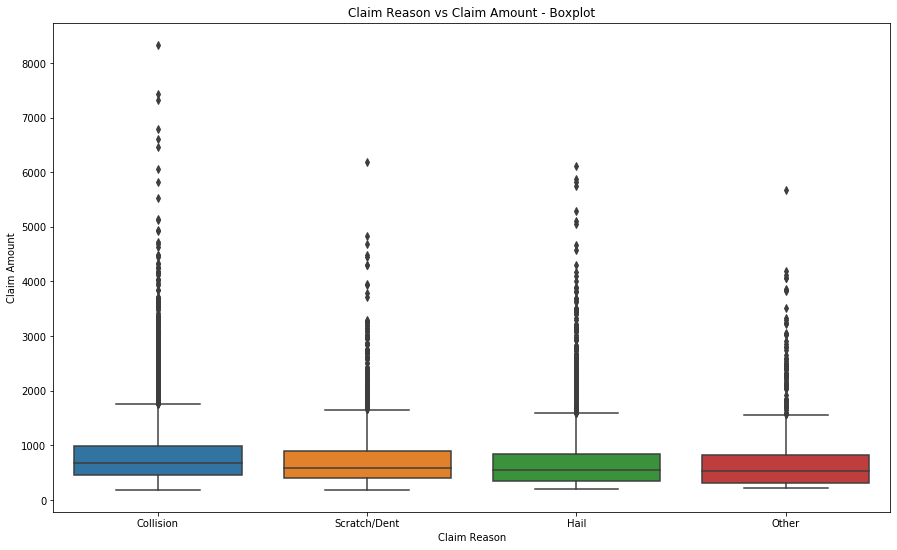

In [265]:
plt.figure(figsize=(15,9))
sns.boxplot(x="Claim Reason", y="Claim Amount",data=df)
plt.title('Claim Reason vs Claim Amount - Boxplot')

Median claim is slightly higher for collisions

Text(0.5, 1.0, 'Sales Channel vs Claim Amount - Boxplot')

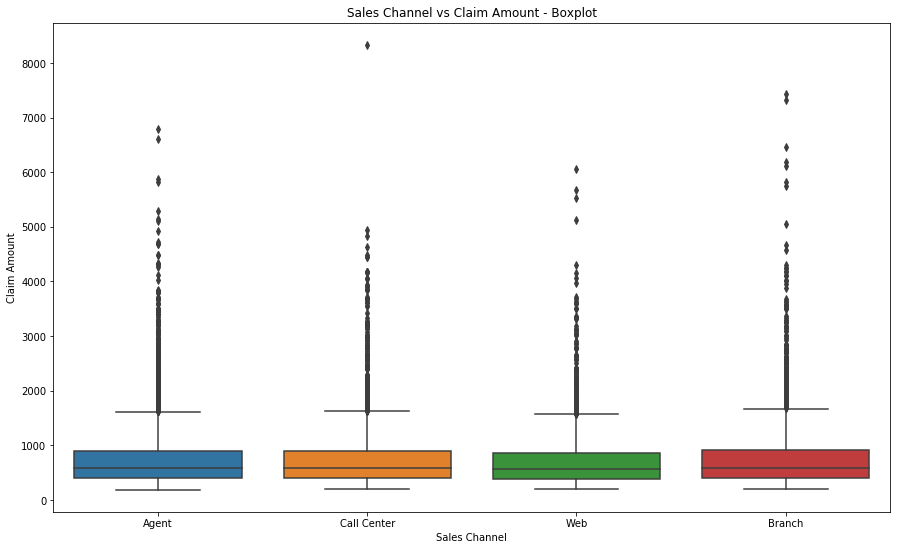

In [266]:
plt.figure(figsize=(15,9))
sns.boxplot(x="Sales Channel", y="Claim Amount",data=df)
plt.title('Sales Channel vs Claim Amount - Boxplot')

Median claims does not depend on sales channels

Text(0.5, 1.0, 'Vehicle Class vs Claim Amount - Boxplot')

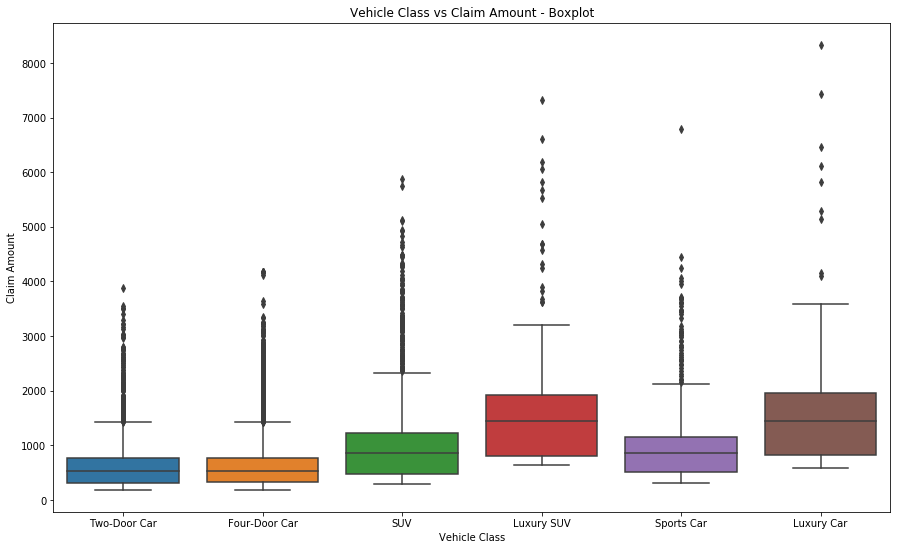

In [267]:
plt.figure(figsize=(15,9))
sns.boxplot(x="Vehicle Class", y="Claim Amount",data=df)
plt.title('Vehicle Class vs Claim Amount - Boxplot')

Claim amounts were the highest for Luxury SUVs & Luxury Cars and the least for two door and four door cars

Text(0.5, 1.0, 'Vehicle Size vs Claim Amount - Boxplot')

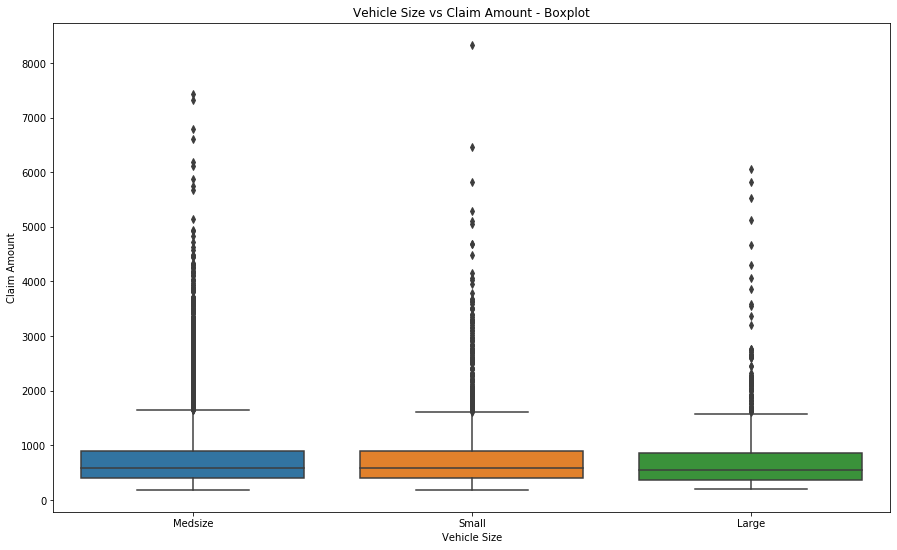

In [268]:
plt.figure(figsize=(15,9))
sns.boxplot(x="Vehicle Size", y="Claim Amount",data=df)
plt.title('Vehicle Size vs Claim Amount - Boxplot')

The median claims are almost the same for all vehicle sizes

In [269]:
cor = df.corr()
cor

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


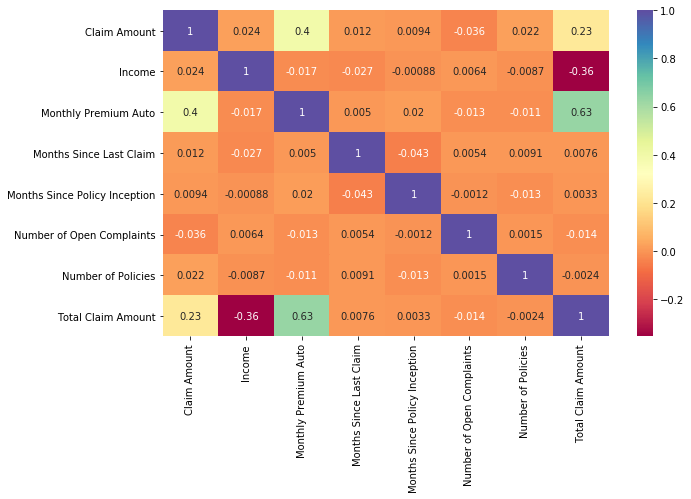

In [270]:
plt.figure(figsize=(10,6))
sns.heatmap(cor,cmap='Spectral',annot=True)

Claim Amount is weakly correlated with monthly premium auto

In [271]:
#Checking for null values
df.isnull().sum()

State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

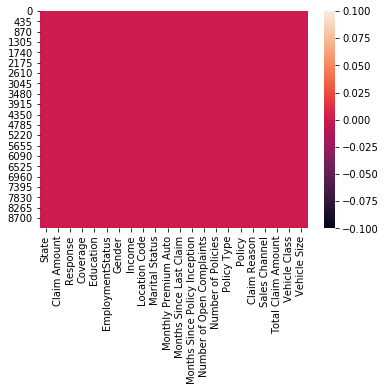

In [272]:
sns.heatmap(df.isnull())

In [273]:
df.skew()

Claim Amount                     3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

Let's drop the features which have no relationship with claim amount (personal info, etc.)

In [274]:
df.drop(["State","Education","EmploymentStatus","Gender","Marital Status","Sales Channel"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Claim Amount                   9134 non-null   float64
 1   Response                       9134 non-null   object 
 2   Coverage                       9134 non-null   object 
 3   Income                         9134 non-null   int64  
 4   Location Code                  9134 non-null   object 
 5   Monthly Premium Auto           9134 non-null   int64  
 6   Months Since Last Claim        9134 non-null   int64  
 7   Months Since Policy Inception  9134 non-null   int64  
 8   Number of Open Complaints      9134 non-null   int64  
 9   Number of Policies             9134 non-null   int64  
 10  Policy Type                    9134 non-null   object 
 11  Policy                         9134 non-null   object 
 12  Claim Reason                   9134 non-null   o

In [275]:
df.drop(["Income"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Claim Amount                   9134 non-null   float64
 1   Response                       9134 non-null   object 
 2   Coverage                       9134 non-null   object 
 3   Location Code                  9134 non-null   object 
 4   Monthly Premium Auto           9134 non-null   int64  
 5   Months Since Last Claim        9134 non-null   int64  
 6   Months Since Policy Inception  9134 non-null   int64  
 7   Number of Open Complaints      9134 non-null   int64  
 8   Number of Policies             9134 non-null   int64  
 9   Policy Type                    9134 non-null   object 
 10  Policy                         9134 non-null   object 
 11  Claim Reason                   9134 non-null   object 
 12  Total Claim Amount             9134 non-null   f

Let us encode the ordinal features for the model

In [276]:
df["Coverage"].replace({"Basic":1,"Extended":2,"Premium":3},inplace=True)

In [280]:
df["Coverage"].value_counts()

1    5568
2    2742
3     824
Name: Coverage, dtype: int64

Vehicles class can be divided into three ordered catgories based on the median claim amounts

In [281]:
df["Vehicle Class"].replace({"Two-Door Car":1,"Four-Door Car":1,"SUV":2,"Sports Car":2,"Luxury SUV":3,"Luxury Car":3},inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [282]:
df["Vehicle Class"].value_counts()

1    6507
2    2280
3     347
Name: Vehicle Class, dtype: int64

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Claim Amount                   9134 non-null   float64
 1   Response                       9134 non-null   object 
 2   Coverage                       9134 non-null   int64  
 3   Location Code                  9134 non-null   object 
 4   Monthly Premium Auto           9134 non-null   int64  
 5   Months Since Last Claim        9134 non-null   int64  
 6   Months Since Policy Inception  9134 non-null   int64  
 7   Number of Open Complaints      9134 non-null   int64  
 8   Number of Policies             9134 non-null   int64  
 9   Policy Type                    9134 non-null   object 
 10  Policy                         9134 non-null   object 
 11  Claim Reason                   9134 non-null   object 
 12  Total Claim Amount             9134 non-null   f

Let's us consider only those claims which were approved by insurer for calculating insurance claim amount

In [284]:
df = df[df["Response"] == "Yes"]
df.shape

(1308, 15)

In [285]:
cat = pd.get_dummies(df)
cat

,Claim Amount,Coverage,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Vehicle Class,Response_Yes,...,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Claim Reason_Collision,Claim Reason_Hail,Claim Reason_Scratch/Dent,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
5,825.629780,1,69,14,94,0,2,159.383042,1,1,...,1,0,0,0,0,1,0,0,1,0
6,538.089864,1,67,0,13,0,9,321.600000,1,1,...,0,0,0,0,1,0,0,0,1,0
8,2412.750402,1,71,13,3,0,2,511.200000,1,1,...,0,0,0,0,1,0,0,0,1,0
13,881.901893,1,110,23,25,1,8,528.000000,2,1,...,0,0,0,0,0,1,0,0,1,0
22,2412.750402,1,71,13,3,0,2,511.200000,1,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,3461.137896,1,109,10,59,0,2,523.200000,2,1,...,0,0,0,0,0,1,0,0,1,0
9119,547.955508,1,68,31,30,1,3,326.400000,1,1,...,0,0,0,0,1,0,0,0,0,1
9122,2546.482059,2,97,1,66,0,2,465.600000,1,1,...,0,0,0,0,1,0,0,0,0,1
9123,567.805017,2,76,8,44,0,3,364.800000,1,1,...,0,0,0,0,0,1,0,0,0,1


In [286]:
cat.columns

Index(['Claim Amount', 'Coverage', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'Vehicle Class', 'Response_Yes', 'Location Code_Rural',
       'Location Code_Suburban', 'Location Code_Urban',
       'Policy Type_Corporate Auto', 'Policy Type_Personal Auto',
       'Policy Type_Special Auto', 'Policy_Corporate L1',
       'Policy_Corporate L2', 'Policy_Corporate L3', 'Policy_Personal L1',
       'Policy_Personal L2', 'Policy_Personal L3', 'Policy_Special L1',
       'Policy_Special L2', 'Policy_Special L3', 'Claim Reason_Collision',
       'Claim Reason_Hail', 'Claim Reason_Scratch/Dent', 'Vehicle Size_Large',
       'Vehicle Size_Medsize', 'Vehicle Size_Small'],
      dtype='object')

In [287]:
cat.drop(["Location Code_Rural","Policy Type_Corporate Auto","Policy_Corporate L1","Claim Reason_Scratch/Dent","Vehicle Size_Small"],axis=1,inplace=True)
cat.shape

(1308, 26)

In [288]:
X=cat.drop("Claim Amount", axis=1)
y=cat["Claim Amount"]

In [289]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[-0.73183616, -0.69275026, -0.07043722, ...,  0.95513387,
        -0.38388595,  0.62332578],
       [-0.73183616, -0.74785683, -1.50359994, ..., -1.04697366,
        -0.38388595,  0.62332578],
       [-0.73183616, -0.63764369, -0.17280599, ..., -1.04697366,
        -0.38388595,  0.62332578],
       ...,
       [ 0.7875951 ,  0.07874173, -1.40123117, ..., -1.04697366,
        -0.38388595, -1.60429751],
       [ 0.7875951 , -0.49987726, -0.68464982, ...,  0.95513387,
        -0.38388595, -1.60429751],
       [ 0.7875951 , -0.41721741, -0.07043722, ..., -1.04697366,
        -0.38388595,  0.62332578]])

Let's do Principal Component Analysis (PCA) for the input features

In [290]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X2)
X_pca = pca.transform(X2)
print("Original shape: {}".format(str(X2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (1308, 25)
Reduced shape: (1308, 5)


Finding best random_state for Linear Regression Model

In [291]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,200):
    X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.25,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 91 is 0.1736553051015831


In [292]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.25,random_state=91)

In [293]:
print(X_train.shape,"\n",X_test.shape)

(981, 25) 
 (327, 25)


Observing performance of different algorithms

In [297]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [298]:
LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNR = KNeighborsRegressor()#(n_neighbors=2)
SV = SVR()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingRegressor()
XGB = xgb.XGBRegressor()# From the GridSearchCV parameter tuning

In [299]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
models.append(("XGBoostRegressor", XGB))

In [300]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, random_state=91, shuffle=True)

In [301]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    print("\n")
    sc = cross_val_score(model,X,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    print("\n")
    mse = mean_squared_error(y_test,pre)
    print("Mean Squared error\n", mse)
    MSE.append(mse)
    print("\n")
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error \n{}".format(mae))
    MAE.append(mae)
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  0.1736553051015831


Cross val score =  0.08369739281624583


Mean Squared error
 304520.9115607381


Mean absolute error 
388.390728831979



***************** Ridge ******************

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.17357736580672356


Cross val score =  0.0842975903431476


Mean Squared error
 304549.6334067953


Mean absolute error 
388.3830803814705



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  0.17281895544894932


Cross val score =  0.08592148402395


Mean Squared error
 304829.1194553079


Mean absolute erro

In [302]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.173655,0.083697,304520.911561,388.390729
1,Ridge,0.173577,0.084298,304549.633407,388.383080
2,Lasso,0.172819,0.085921,304829.119455,388.580751
3,KNeighborsRegressor,0.201591,0.784624,294226.153809,346.610343
4,SVR,-0.146235,-0.110049,422405.552383,397.273488
5,DecisionTreeRegressor,0.937859,0.982451,22899.981967,20.498370
6,RandomForestRegressor,0.928106,0.976181,26494.059207,30.617429
7,AdaBoostRegressor,0.693022,0.687302,113126.006702,239.683927
8,GradientBoostingRegressor,0.873699,0.894677,46543.846664,113.743914
9,XGBoostRegressor,0.988181,0.997067,4355.336079,9.713368


Clearly XGBoost provides the best generalization performance

In [303]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [440,439,441]
             }
grid = GridSearchCV(estimator=XGB,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exac

In [304]:
XGB = xgb.XGBRegressor(n_estimators=440)
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=440, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Saving the model

In [305]:
from sklearn.externals import joblib
joblib.dump(XGB,'Insurance_Claim_Amount.pkl')

['Insurance_Claim_Amount.pkl']

# Insurance Fraud Detection

# Dataset Description

The dataset contains insurance fraud details along with other associated features. It can be used to analyse the relationship between fraud claims and associaetd features, also we can prepare a machine learning model to predict whether an insurance claim is fraud or not.

In [306]:
df1 = pd.read_csv("insurance_fraud.csv")
df1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [307]:
df1.shape

(1000, 40)

In [308]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Text(0.5, 1.0, 'months_as_customer - Distplot')

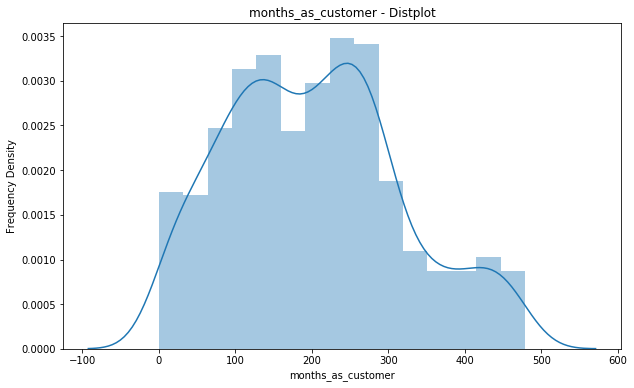

In [309]:
plt.figure(figsize=(10,6))
sns.distplot(df1["months_as_customer"])
#plt.xticks(rotation = 90)
plt.xlabel('months_as_customer')
plt.ylabel('Frequency Density')
plt.title('months_as_customer - Distplot')

The distribution of months as customer is skewed to the right

Text(0.5, 1.0, 'age - Distplot')

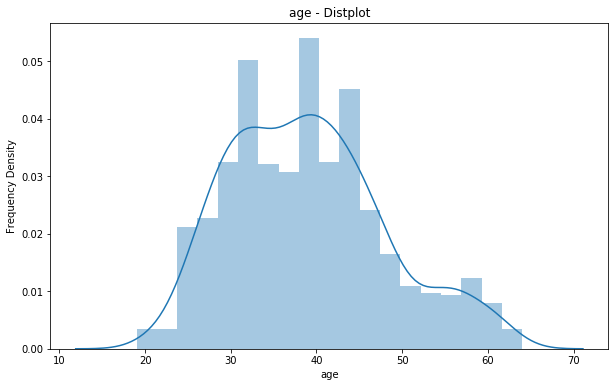

In [310]:
plt.figure(figsize=(10,6))
sns.distplot(df1["age"])
#plt.xticks(rotation = 90)
plt.xlabel('age')
plt.ylabel('Frequency Density')
plt.title('age - Distplot')

The distribution of ages of claimaints is skewed to the right

In [311]:
df1["policy_number"].nunique()

1000

Let's drop policy number as it does not contain any useful info()

In [312]:
df1.drop("policy_number",axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [313]:
df1["policy_bind_date"].nunique()

951

Let's drop policy bind date as it does not contain any useful info

In [314]:
df1.drop("policy_bind_date",axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

Text(0.5, 1.0, 'Number of claims as per state')

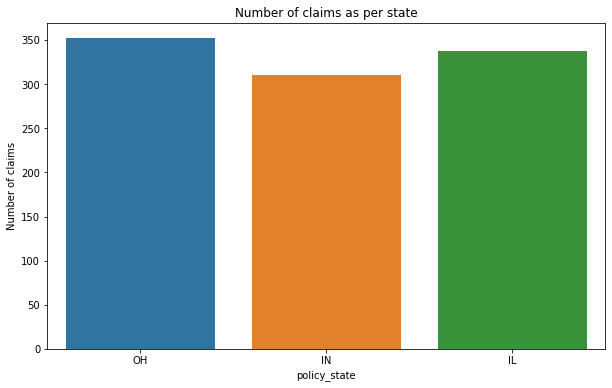

In [315]:
plt.figure(figsize=(10,6))
sns.countplot(df1["policy_state"])
plt.ylabel('Number of claims')
#plt.xticks(rotation=90)
plt.title('Number of claims as per state')

The number of claims are almost evenly distributed among 3 states

Text(0.5, 1.0, 'Number of claims as per Combined single limit (csl)')

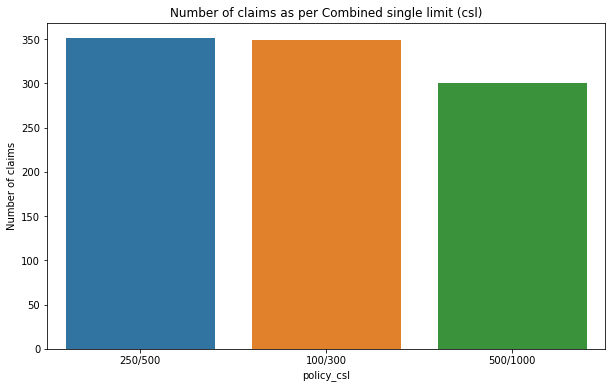

In [316]:
plt.figure(figsize=(10,6))
sns.countplot(df1["policy_csl"])
plt.ylabel('Number of claims')
#plt.xticks(rotation=90)
plt.title('Number of claims as per Combined single limit (csl)')

Relatively lesser claims have Combined single limit (csl) of 500/1000

Text(0.5, 1.0, 'Number of Cases as per policy_deductable')

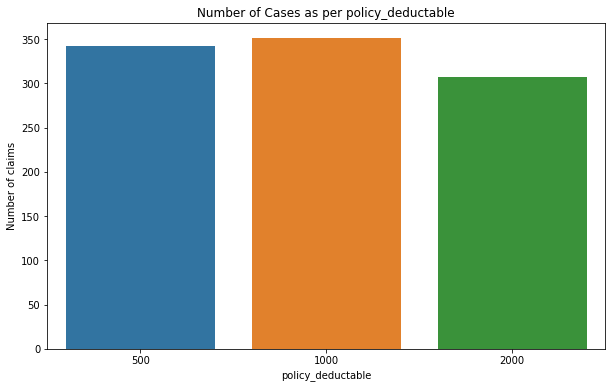

In [317]:
plt.figure(figsize=(10,6))
sns.countplot(df1["policy_deductable"])
plt.ylabel('Number of claims')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per policy_deductable')

Relatively lesser claims have policy_deductable value of 2000 dollars

Text(0.5, 1.0, 'policy_annual_premium - Distplot')

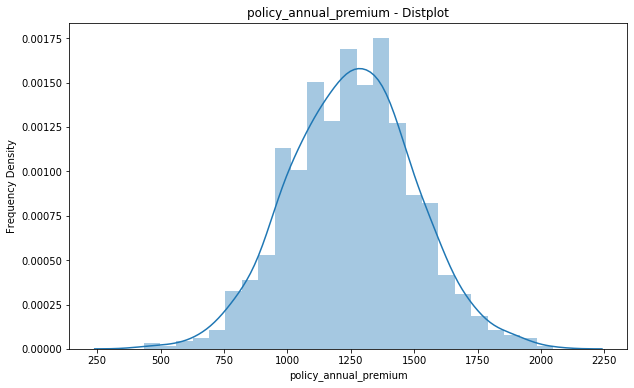

In [318]:
plt.figure(figsize=(10,6))
sns.distplot(df1["policy_annual_premium"])
#plt.xticks(rotation = 90)
plt.xlabel('policy_annual_premium')
plt.ylabel('Frequency Density')
plt.title('policy_annual_premium - Distplot')

The distribution of policy_annual_premium approximates a normal distribution

Text(0.5, 1.0, 'Number of claims as per umbrella_limit')

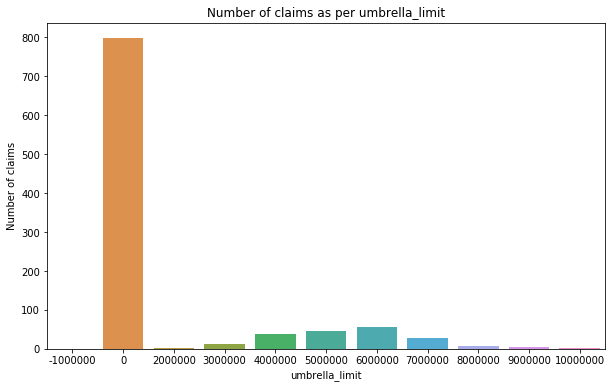

In [319]:
plt.figure(figsize=(10,6))
sns.countplot(df1["umbrella_limit"])
plt.ylabel('Number of claims')
#plt.xticks(rotation=90)
plt.title('Number of claims as per umbrella_limit')

Around 800 out of 1000 claims have umbrella limit of 0

In [320]:
df1["insured_zip"].nunique()

995

Let's drop insured_zip as it does not contain any analytical info

In [322]:
df1.drop("insured_zip",axis=1,inplace=True)
df1.info()

KeyError: "['insured_zip'] not found in axis"

Text(0.5, 1.0, 'Number of claims as per Gender')

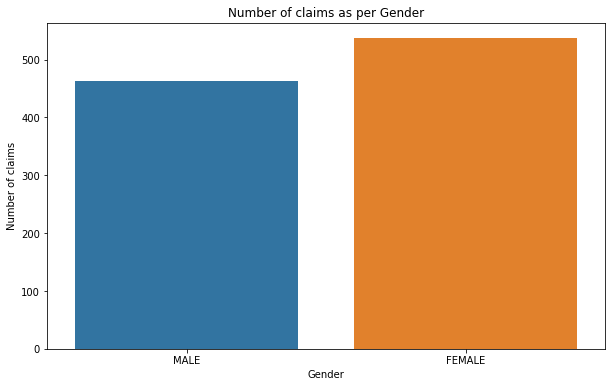

In [323]:
plt.figure(figsize=(10,6))
sns.countplot(df1["insured_sex"])
plt.ylabel('Number of claims')
plt.xlabel('Gender')
#plt.xticks(rotation=90)
plt.title('Number of claims as per Gender')

The dataset contains slightly higher number of claims by females

Text(0.5, 1.0, 'Number of claims as per education_level')

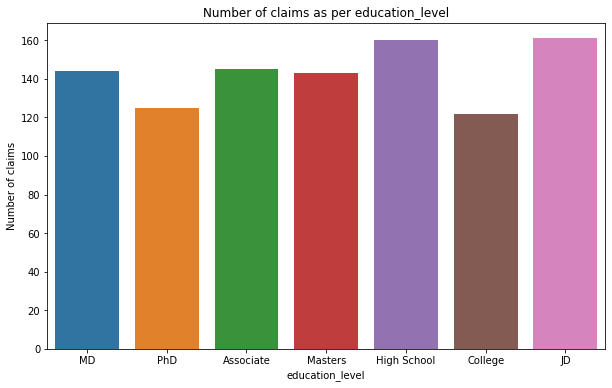

In [324]:
plt.figure(figsize=(10,6))
sns.countplot(df1["insured_education_level"])
plt.ylabel('Number of claims')
plt.xlabel('education_level')
#plt.xticks(rotation=90)
plt.title('Number of claims as per education_level')

Most of the claimants had education level of JD followed by High School

Text(0.5, 1.0, 'Number of Cases as per occupation')

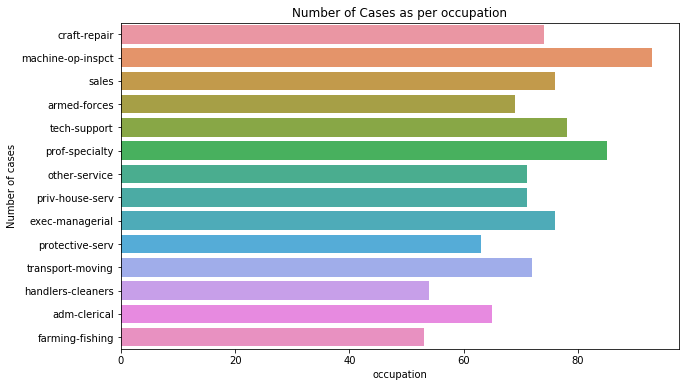

In [325]:
plt.figure(figsize=(10,6))
sns.countplot(y=df1["insured_occupation"])
plt.ylabel('Number of cases')
plt.xlabel('occupation')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per occupation')

Highest number of claimaints have machine-op-inspect as occupation followed by prof-speciality whereas least have farming & fishing as occupation followed by handlers-cleaners

Text(0.5, 1.0, 'Number of Cases as per hobbies')

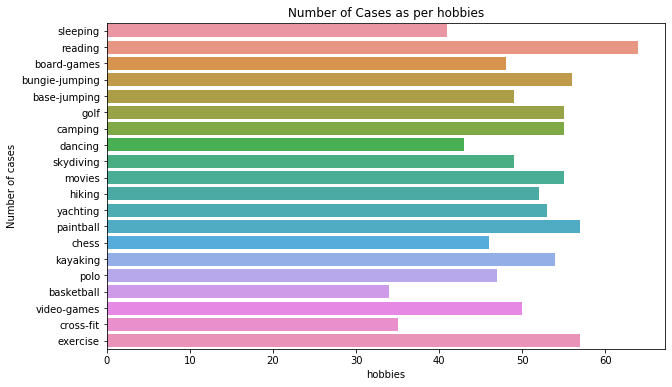

In [326]:
plt.figure(figsize=(10,6))
sns.countplot(y=df1["insured_hobbies"])
plt.ylabel('Number of cases')
plt.xlabel('hobbies')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per hobbies')

Highest number of claimaints have reading as hobby followed by bungie jumping,paintball,exercise in order, whereas least have basketball as hobby followed by cross-fit

Text(0.5, 1.0, 'Number of claims as per relationship')

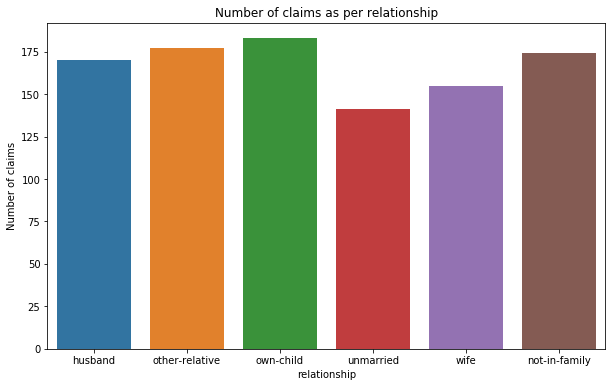

In [328]:
plt.figure(figsize=(10,6))
sns.countplot(df1["insured_relationship"])
plt.ylabel('Number of claims')
plt.xlabel('relationship')
#plt.xticks(rotation=90)
plt.title('Number of claims as per relationship')

Most of the claimaints belong to  own child, other relative & not in family category

Text(0.5, 1.0, 'capital-gains - Distplot')

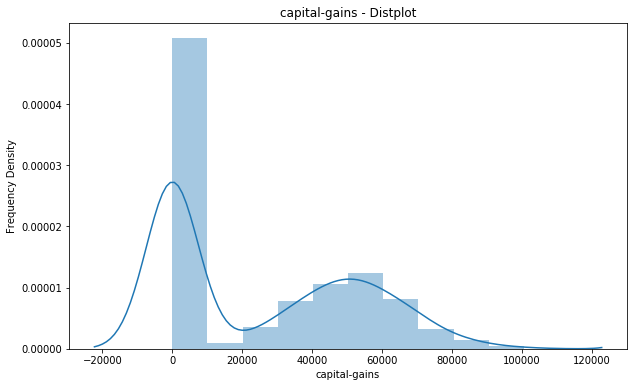

In [329]:
plt.figure(figsize=(10,6))
sns.distplot(df1["capital-gains"])
#plt.xticks(rotation = 90)
plt.xlabel('capital-gains')
plt.ylabel('Frequency Density')
plt.title('capital-gains - Distplot')

Let's look at claimaints who invest money

In [330]:
gain = df1[df1["capital-gains"] != 0]

Text(0.5, 1.0, 'capital-gains - Distplot')

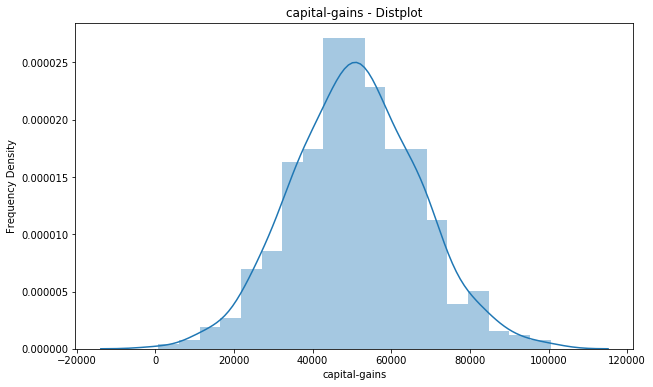

In [331]:
plt.figure(figsize=(10,6))
sns.distplot(gain["capital-gains"])
#plt.xticks(rotation = 90)
plt.xlabel('capital-gains')
plt.ylabel('Frequency Density')
plt.title('capital-gains - Distplot')

The distribution of capital gains made by investors approximates a normal distribution

Text(0.5, 1.0, 'capital-loss - Distplot')

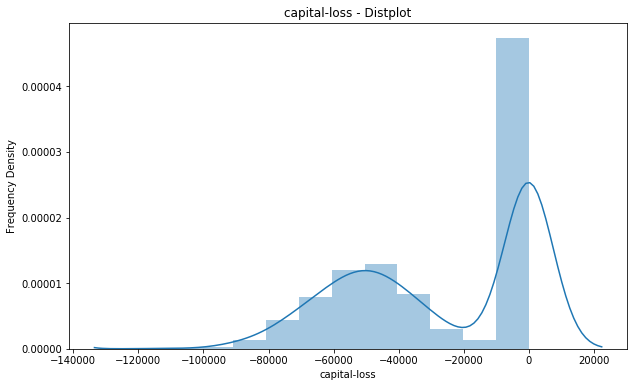

In [332]:
plt.figure(figsize=(10,6))
sns.distplot(df1["capital-loss"])
#plt.xticks(rotation = 90)
plt.xlabel('capital-loss')
plt.ylabel('Frequency Density')
plt.title('capital-loss - Distplot')

Let's look at claimaints who invest money

In [333]:
loss = df1[df1["capital-loss"] != 0]

Text(0.5, 1.0, 'capital-loss - Distplot')

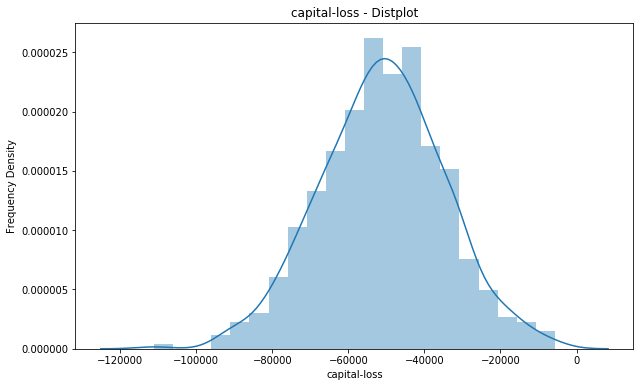

In [334]:
plt.figure(figsize=(10,6))
sns.distplot(loss["capital-loss"])
#plt.xticks(rotation = 90)
plt.xlabel('capital-loss')
plt.ylabel('Frequency Density')
plt.title('capital-loss - Distplot')

The distribution of capital loss made by investors approximates a normal distribution

Text(0.5, 1.0, 'Number of Cases as per incident_date')

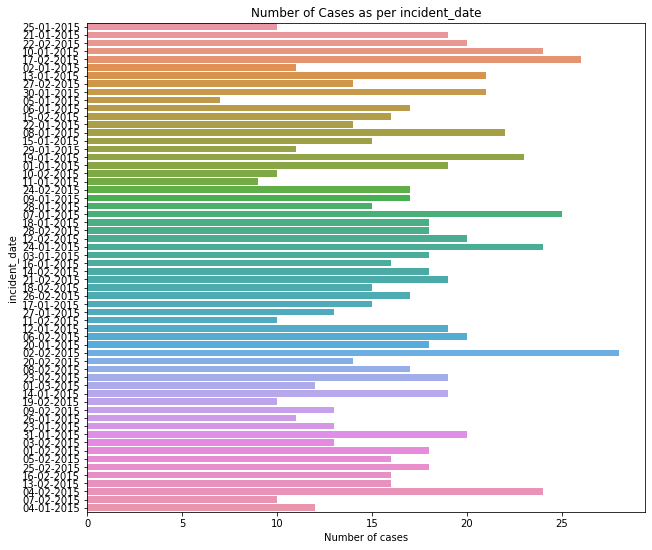

In [335]:
plt.figure(figsize=(10,9))
sns.countplot(y=df1["incident_date"])
plt.xlabel('Number of cases')
plt.ylabel('incident_date')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per incident_date')

Let's drop the incident date column for simplicity

In [336]:
df1.drop("incident_date",axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

Text(0.5, 1.0, 'Number of claims as per incident_type')

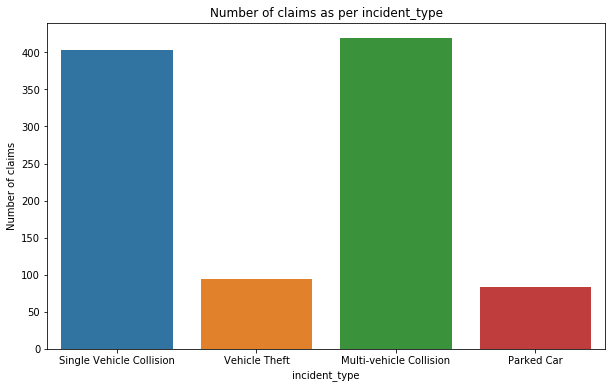

In [337]:
plt.figure(figsize=(10,6))
sns.countplot(df1["incident_type"])
plt.ylabel('Number of claims')
plt.xlabel('incident_type')
#plt.xticks(rotation=90)
plt.title('Number of claims as per incident_type')

Most of the claims are for Multi vehicle collision followed by Single vehicle collision

Text(0.5, 1.0, 'Number of claims as per collision_type')

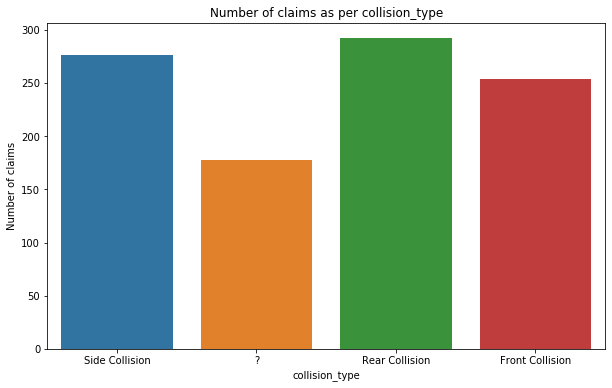

In [338]:
plt.figure(figsize=(10,6))
sns.countplot(df1["collision_type"])
plt.ylabel('Number of claims')
plt.xlabel('collision_type')
#plt.xticks(rotation=90)
plt.title('Number of claims as per collision_type')

In [339]:
df1["collision_type"].replace('?', "collision_unknown",inplace=True)

Text(0.5, 1.0, 'Number of Cases as per collision_type')

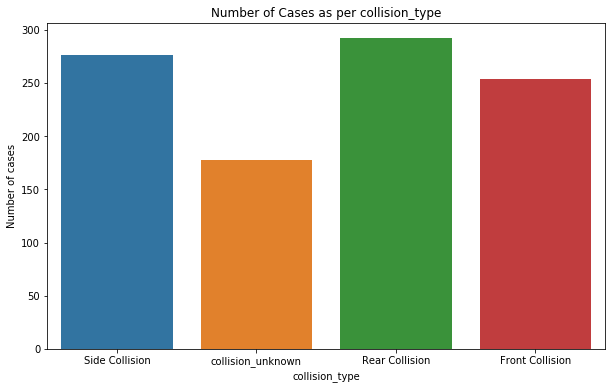

In [340]:
plt.figure(figsize=(10,6))
sns.countplot(df1["collision_type"])
plt.ylabel('Number of cases')
plt.xlabel('collision_type')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per collision_type')

Most of the collision claims are for rear collision followed by side collision

Text(0.5, 1.0, 'Number of claims as per incident_severity')

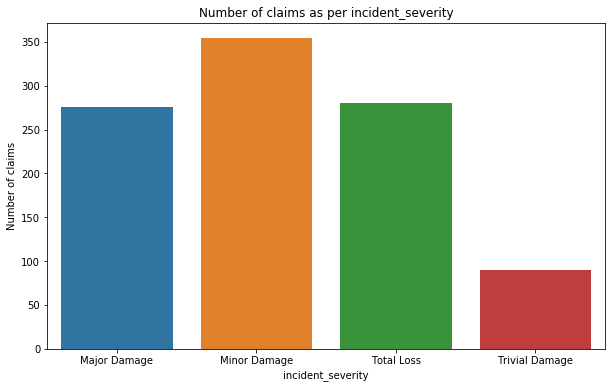

In [341]:
plt.figure(figsize=(10,6))
sns.countplot(df1["incident_severity"])
plt.ylabel('Number of claims')
plt.xlabel('incident_severity')
#plt.xticks(rotation=90)
plt.title('Number of claims as per incident_severity')

Most of the claims had minor damage followed by total loss

Text(0.5, 1.0, 'Number of Cases as per authorities_contacted')

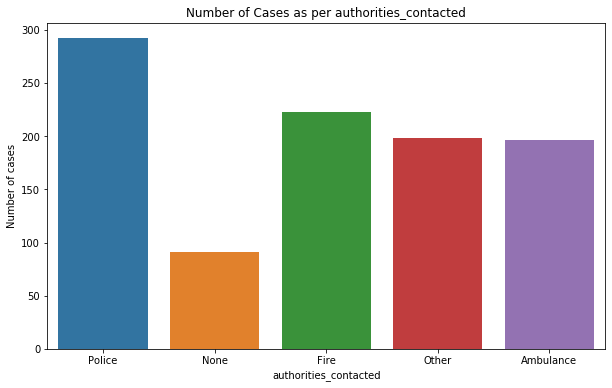

In [342]:
plt.figure(figsize=(10,6))
sns.countplot(df1["authorities_contacted"])
plt.ylabel('Number of cases')
plt.xlabel('authorities_contacted')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per authorities_contacted')

Police were contacted for most of the incidents folowed by Fire Department

Text(0.5, 1.0, 'Number of Cases as per incident_state')

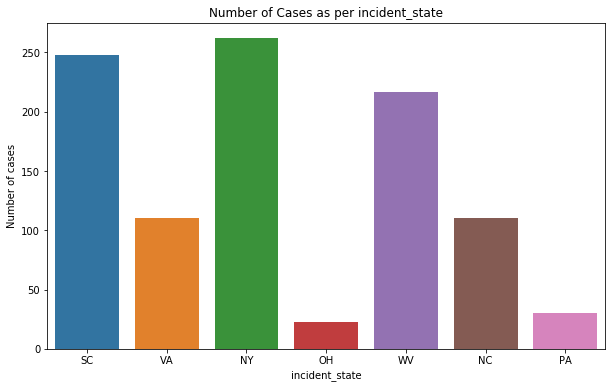

In [343]:
plt.figure(figsize=(10,6))
sns.countplot(df1["incident_state"])
plt.ylabel('Number of cases')
plt.xlabel('incident_state')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per incident_state')

Most of the incidents happened in NY followed by SC

Text(0.5, 1.0, 'Number of Cases as per incident_city')

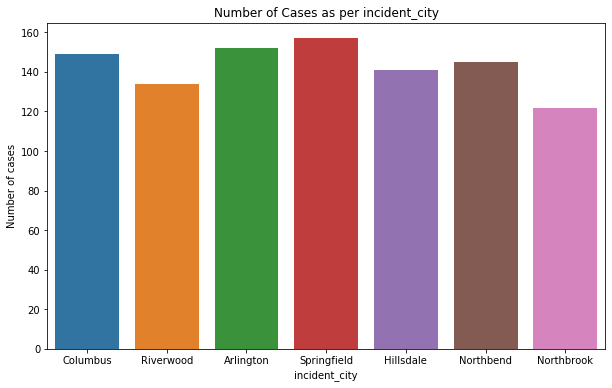

In [344]:
plt.figure(figsize=(10,6))
sns.countplot(df1["incident_city"])
plt.ylabel('Number of cases')
plt.xlabel('incident_city')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per incident_city')

Highest number of incidents were reported from Springfield city followed by Arlington, least were reported from Northbrook

In [345]:
df1["incident_location"].nunique()

1000

Incident Location is unique for each claim and does not contain any useful info so let's drop it

In [346]:
df1.drop("incident_location",axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

Text(0.5, 1.0, 'Number of claims as per incident_hour_of_the_day')

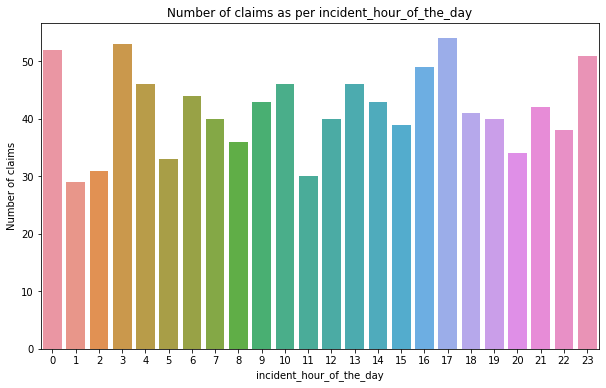

In [347]:
plt.figure(figsize=(10,6))
sns.countplot(df1["incident_hour_of_the_day"])
plt.ylabel('Number of claims')
plt.xlabel('incident_hour_of_the_day')
#plt.xticks(rotation=90)
plt.title('Number of claims as per incident_hour_of_the_day')

Highest number of incidents happened around 5PM and least happened around 1AM

Text(0.5, 1.0, 'Number of claims as per number_of_vehicles_involved')

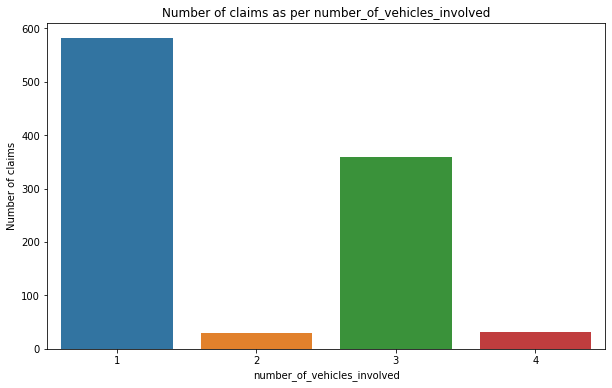

In [348]:
plt.figure(figsize=(10,6))
sns.countplot(df1["number_of_vehicles_involved"])
plt.ylabel('Number of claims')
plt.xlabel('number_of_vehicles_involved')
#plt.xticks(rotation=90)
plt.title('Number of claims as per number_of_vehicles_involved')

Most of the incidents had 1 vehicle involved followed by 3 vehicles

Text(0.5, 1.0, 'Number of claims as per property_damage')

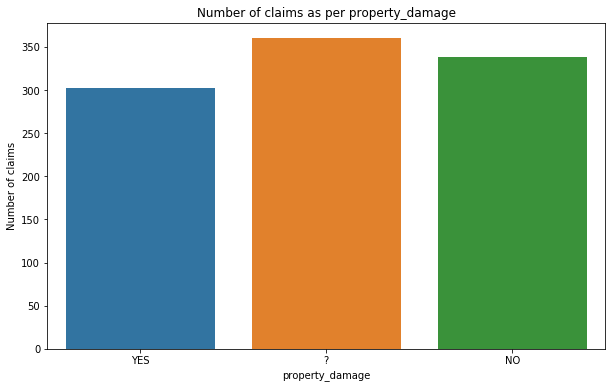

In [349]:
plt.figure(figsize=(10,6))
sns.countplot(df1["property_damage"])
plt.ylabel('Number of claims')
plt.xlabel('property_damage')
#plt.xticks(rotation=90)
plt.title('Number of claims as per property_damage')

In [350]:
df1["property_damage"].replace('?', "property_damage_unknown",inplace=True)

Text(0.5, 1.0, 'Number of Cases as per property_damage')

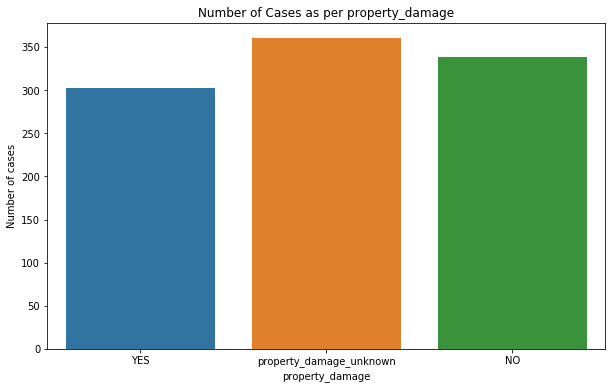

In [351]:
plt.figure(figsize=(10,6))
sns.countplot(df1["property_damage"])
plt.ylabel('Number of cases')
plt.xlabel('property_damage')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per property_damage')

Property damage was confirmed in around 300 claims

Text(0.5, 1.0, 'Number of Cases as per bodily_injuries')

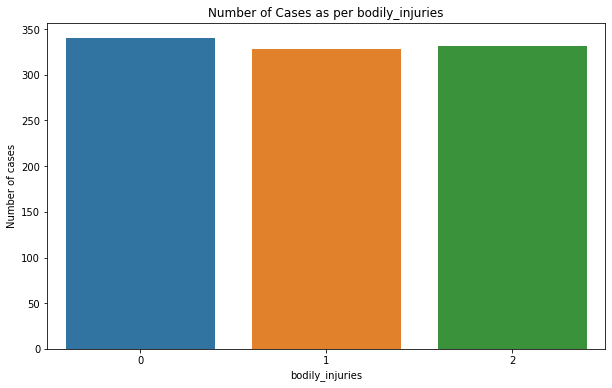

In [352]:
plt.figure(figsize=(10,6))
sns.countplot(df1["bodily_injuries"])
plt.ylabel('Number of cases')
plt.xlabel('bodily_injuries')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per bodily_injuries')

Almost 2/3 number of total claims had bodily injuries

Text(0.5, 1.0, 'Number of Cases as per witnesses')

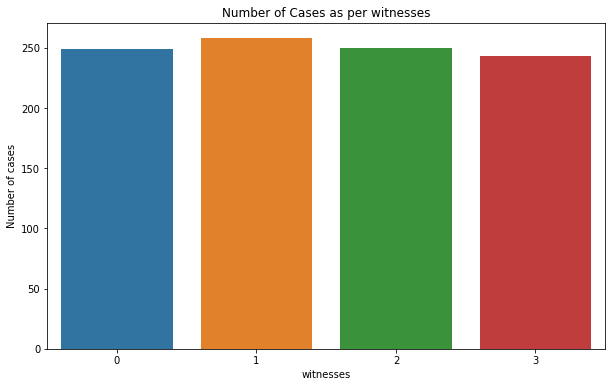

In [353]:
plt.figure(figsize=(10,6))
sns.countplot(df1["witnesses"])
plt.ylabel('Number of cases')
plt.xlabel('witnesses')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per witnesses')

Almost 3/4 of total claims had witnesses

Text(0.5, 1.0, 'Number of Cases as per police_report_available')

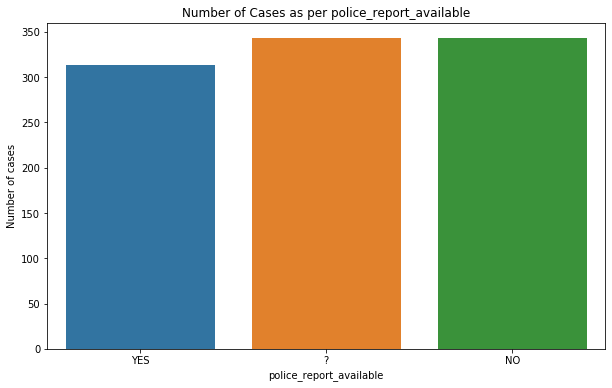

In [354]:
plt.figure(figsize=(10,6))
sns.countplot(df1["police_report_available"])
plt.ylabel('Number of cases')
plt.xlabel('police_report_available')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per police_report_available')

In [355]:
df1["police_report_available"].replace('?', "police_report_unk",inplace=True)

Text(0.5, 1.0, 'Number of Cases as per police_report_available')

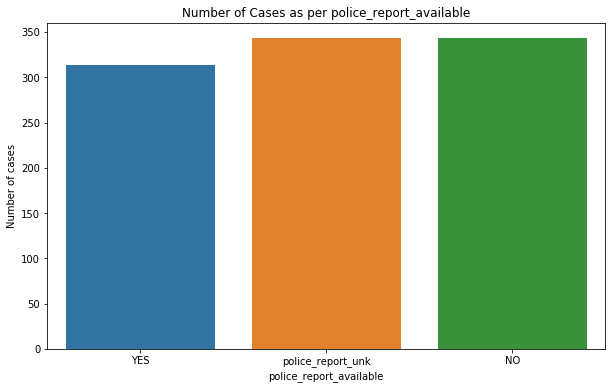

In [356]:
plt.figure(figsize=(10,6))
sns.countplot(df1["police_report_available"])
plt.ylabel('Number of cases')
plt.xlabel('police_report_available')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per police_report_available')

Police report was available for almost 1/3 of total number of claims

Text(0.5, 1.0, 'total_claim_amount - Distplot')

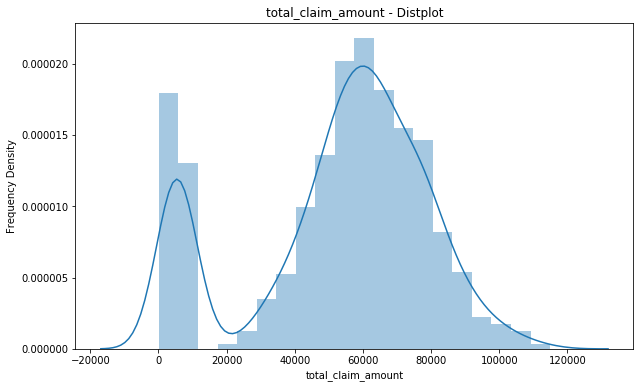

In [357]:
plt.figure(figsize=(10,6))
sns.distplot(df1["total_claim_amount"])
#plt.xticks(rotation = 90)
plt.xlabel('total_claim_amount')
plt.ylabel('Frequency Density')
plt.title('total_claim_amount - Distplot')

Total_Claim_Amount approxiamtes a normal distribution, also many claims had very low claim amounts

Text(0.5, 1.0, 'injury_claim - Distplot')

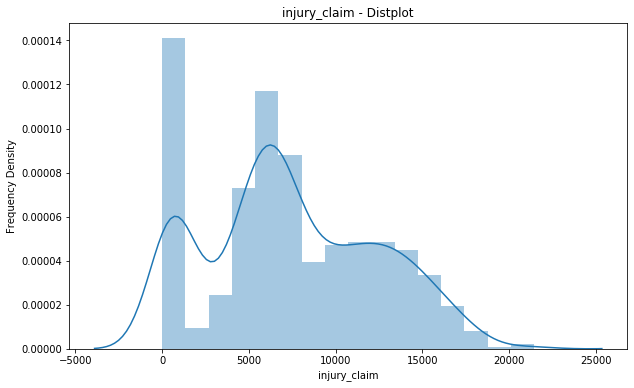

In [358]:
plt.figure(figsize=(10,6))
sns.distplot(df1["injury_claim"])
#plt.xticks(rotation = 90)
plt.xlabel('injury_claim')
plt.ylabel('Frequency Density')
plt.title('injury_claim - Distplot')

Injury_Claim_Amount approxiamtes a normal distribution skewed to the right, also many claims had very low injury claim amounts

Text(0.5, 1.0, 'property_claim - Distplot')

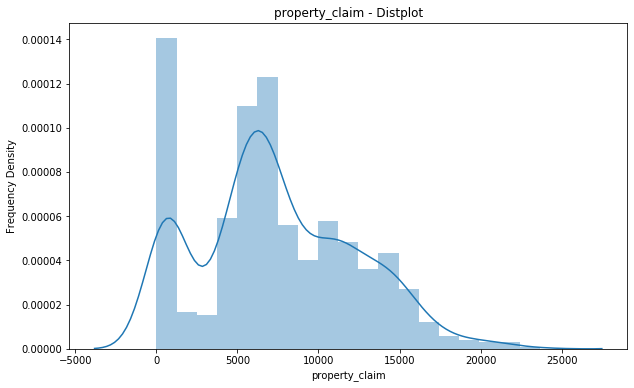

In [359]:
plt.figure(figsize=(10,6))
sns.distplot(df1["property_claim"])
#plt.xticks(rotation = 90)
plt.xlabel('property_claim')
plt.ylabel('Frequency Density')
plt.title('property_claim - Distplot')

Property_Claim_Amount approxiamtes a normal distribution skewed to the right, also many claims had very low property claim amounts

Text(0.5, 1.0, 'vehicle_claim - Distplot')

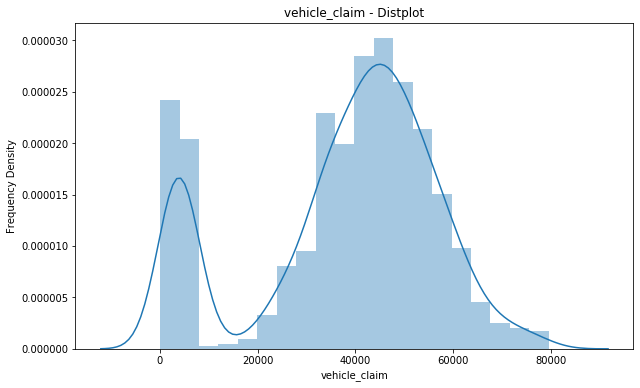

In [360]:
plt.figure(figsize=(10,6))
sns.distplot(df1["vehicle_claim"])
#plt.xticks(rotation = 90)
plt.xlabel('vehicle_claim')
plt.ylabel('Frequency Density')
plt.title('vehicle_claim - Distplot')

Vehicle_Claim_Amount approxiamtes a normal distribution skewed to the right, also many claims had very low vehicle claim amounts

Text(0.5, 1.0, 'Number of Cases as per auto_make')

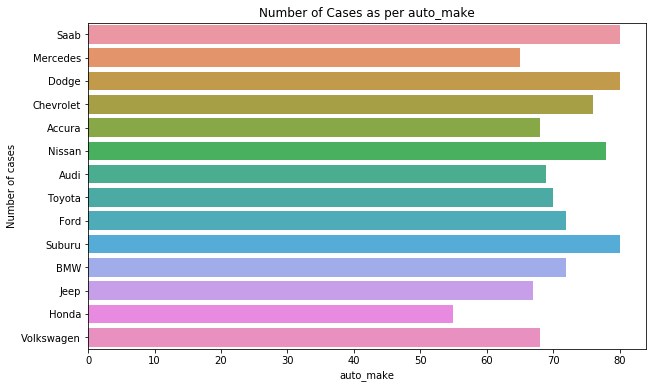

In [361]:
plt.figure(figsize=(10,6))
sns.countplot(y=df1["auto_make"])
plt.ylabel('Number of cases')
plt.xlabel('auto_make')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per auto_make')

Highest number of claims were made for auto make Saab, Suburu & Dudge and least for Honda

In [362]:
df1["auto_model"].nunique()

39

Text(0.5, 1.0, 'Number of Cases as per auto_model')

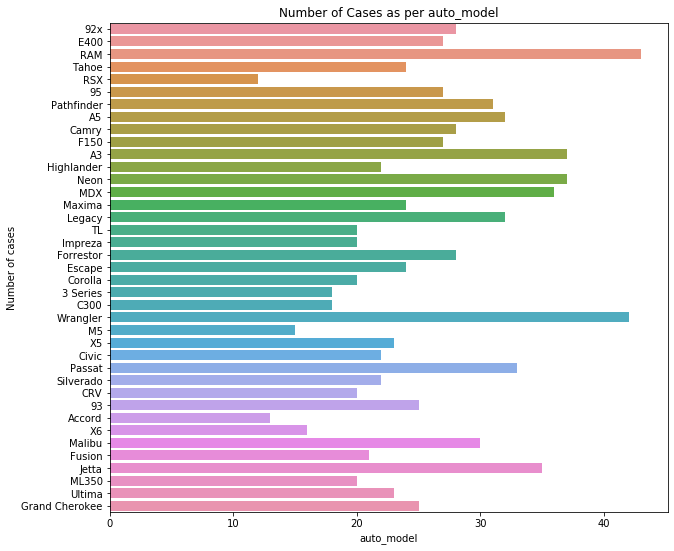

In [363]:
plt.figure(figsize=(10,9))
sns.countplot(y=df1["auto_model"])
plt.ylabel('Number of cases')
plt.xlabel('auto_model')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per auto_model')

Highest number of claims were made for auto model - RAM followed by wrangler and least for RSX followed by Accord

Text(0.5, 1.0, 'Number of Cases as per auto_year')

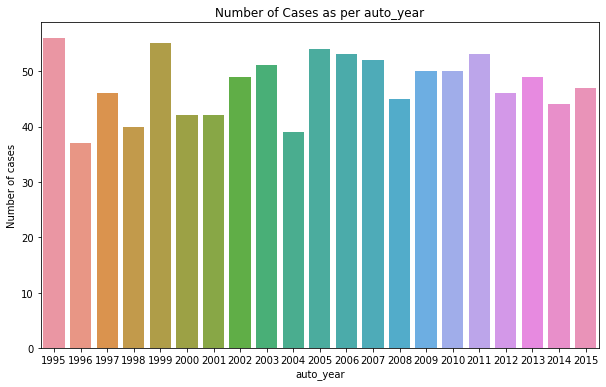

In [364]:
plt.figure(figsize=(10,6))
sns.countplot(df1["auto_year"])
plt.ylabel('Number of cases')
plt.xlabel('auto_year')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per auto_year')

Least number of claims were made for auto manufatured year 1996 followed by 2004

N    753
Y    247
Name: fraud_reported, dtype: int64

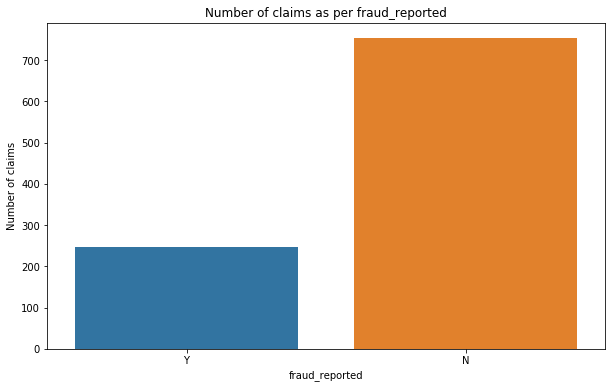

In [365]:
plt.figure(figsize=(10,6))
sns.countplot(df1["fraud_reported"])
plt.ylabel('Number of claims')
plt.xlabel('fraud_reported')
#plt.xticks(rotation=90)
plt.title('Number of claims as per fraud_reported')
df1["fraud_reported"].value_counts()

247 out of the 100 claims are fraud in the dataset

In [366]:
df1.drop("_c39",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 5 to 9130
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Claim Amount                   1308 non-null   float64
 1   Response                       1308 non-null   object 
 2   Coverage                       1308 non-null   int64  
 3   Location Code                  1308 non-null   object 
 4   Monthly Premium Auto           1308 non-null   int64  
 5   Months Since Last Claim        1308 non-null   int64  
 6   Months Since Policy Inception  1308 non-null   int64  
 7   Number of Open Complaints      1308 non-null   int64  
 8   Number of Policies             1308 non-null   int64  
 9   Policy Type                    1308 non-null   object 
 10  Policy                         1308 non-null   object 
 11  Claim Reason                   1308 non-null   object 
 12  Total Claim Amount             1308 non-null   f

Bivariate analysis: let's look at insurance fraud's relationship with other features in the dataset

Text(0.5, 1.0, 'fraud_reported vs months_as_customer - Boxplot')

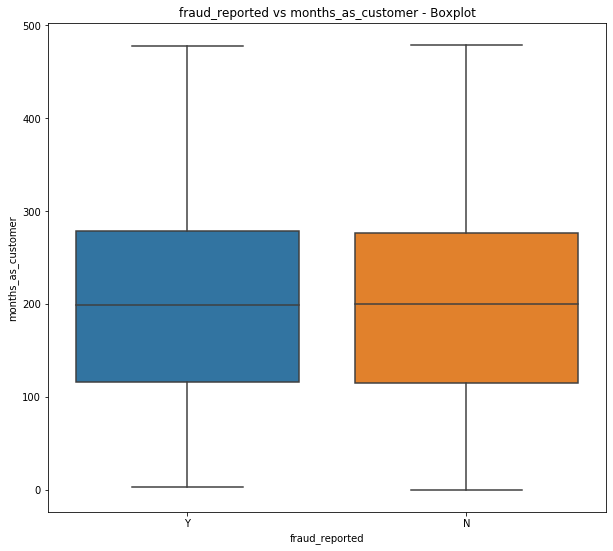

In [367]:
plt.figure(figsize=(10,9))
sns.boxplot(x="fraud_reported", y="months_as_customer",data=df1)
plt.title('fraud_reported vs months_as_customer - Boxplot')

The above plot shows that fraud insurance claims does not depend whether the customer is new or old

Text(0.5, 1.0, 'fraud_reported vs age - Boxplot')

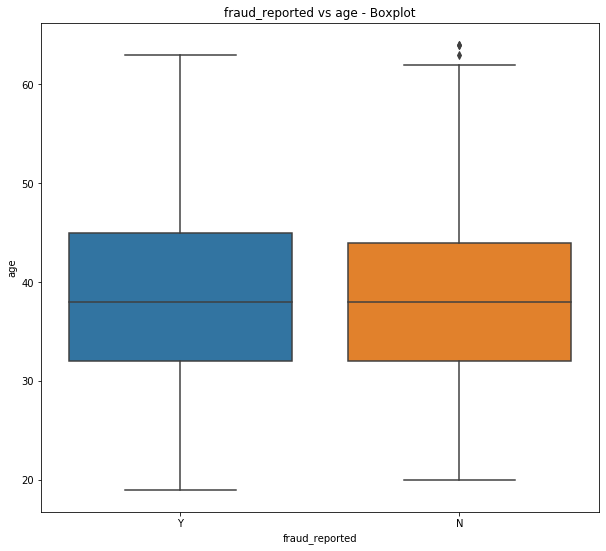

In [368]:
plt.figure(figsize=(10,9))
sns.boxplot(x="fraud_reported", y="age",data=df1)
plt.title('fraud_reported vs age - Boxplot')

The above plot shows that fraud insurance claims does not depend on age

Text(0.5, 1.0, 'policy_state as per fraud_reported - Barplot')

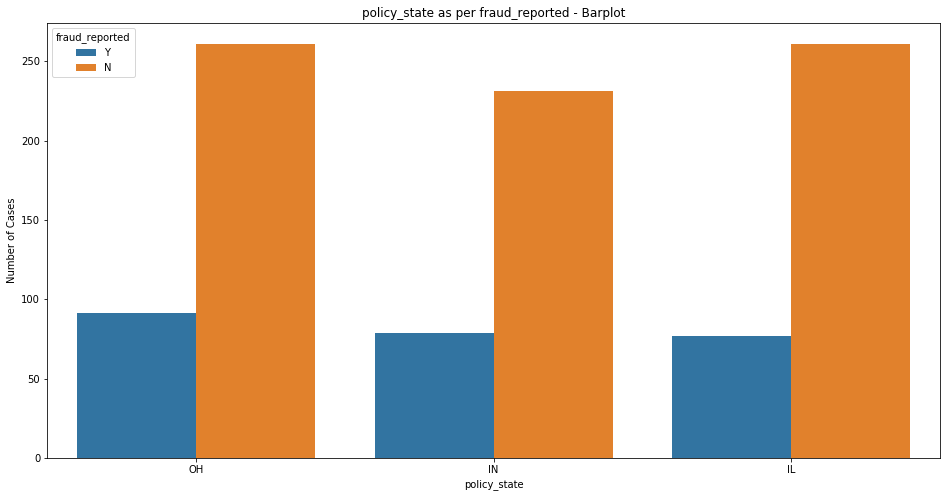

In [369]:
plt.figure(figsize=(16,8))
sns.countplot(x="policy_state",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('policy_state as per fraud_reported - Barplot')

The above plot shows that fraud insurance claims is almost the same in all 3 policy state

Text(0.5, 1.0, 'policy_csl as per fraud_reported - Barplot')

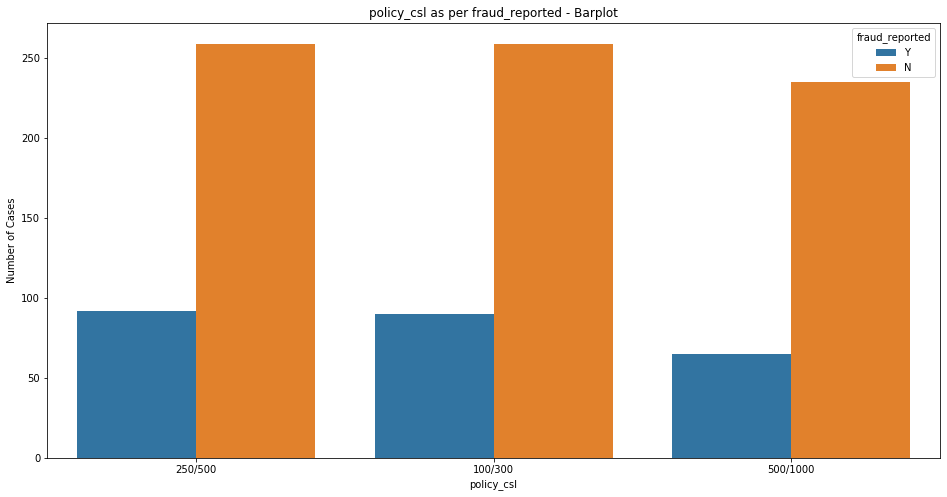

In [370]:
plt.figure(figsize=(16,8))
sns.countplot(x="policy_csl",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('policy_csl as per fraud_reported - Barplot')

Fraud insurance claims are relatively low for policy_csl 500/1000

Text(0.5, 1.0, 'policy_deductable as per fraud_reported - Barplot')

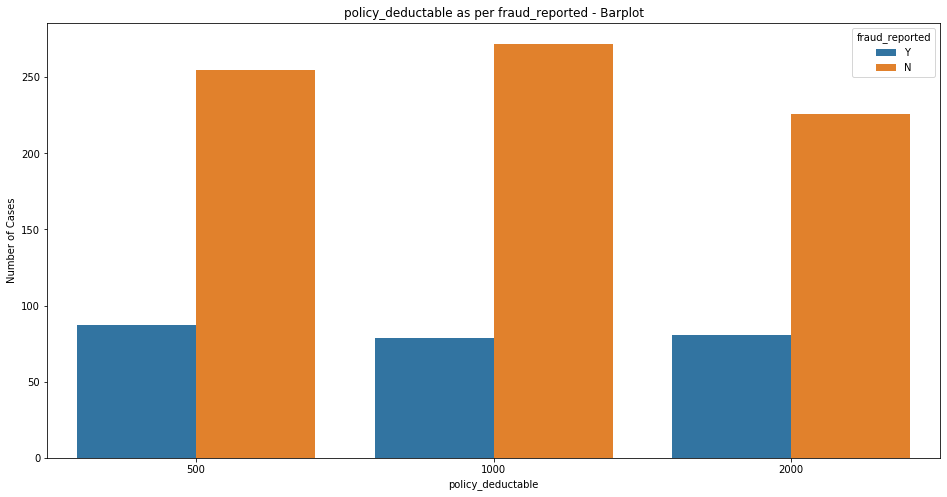

In [371]:
plt.figure(figsize=(16,8))
sns.countplot(x="policy_deductable",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('policy_deductable as per fraud_reported - Barplot')

Policy deductable 2000 has relatively higher fraction of fraud insurance claims

Text(0.5, 1.0, 'fraud_reported vs policy_annual_premium - Boxplot')

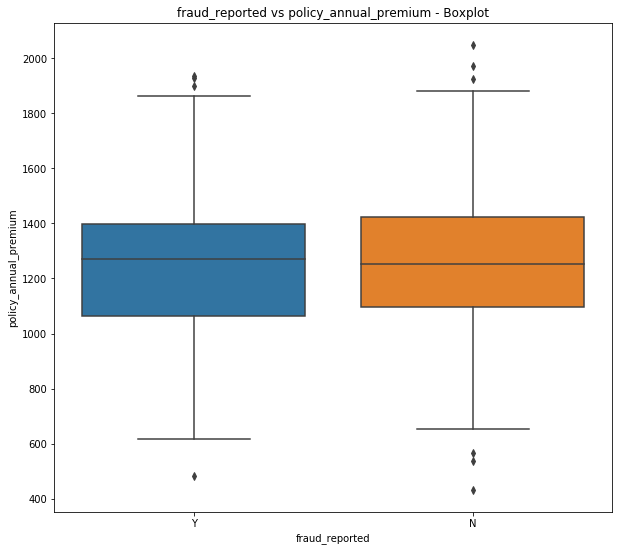

In [372]:
plt.figure(figsize=(10,9))
sns.boxplot(x="fraud_reported", y="policy_annual_premium",data=df1)
plt.title('fraud_reported vs policy_annual_premium - Boxplot')

Fraud insurance claims are not related to the amount paid as policy annual premium

Text(0.5, 1.0, 'umbrella_limit as per fraud_reported - Barplot')

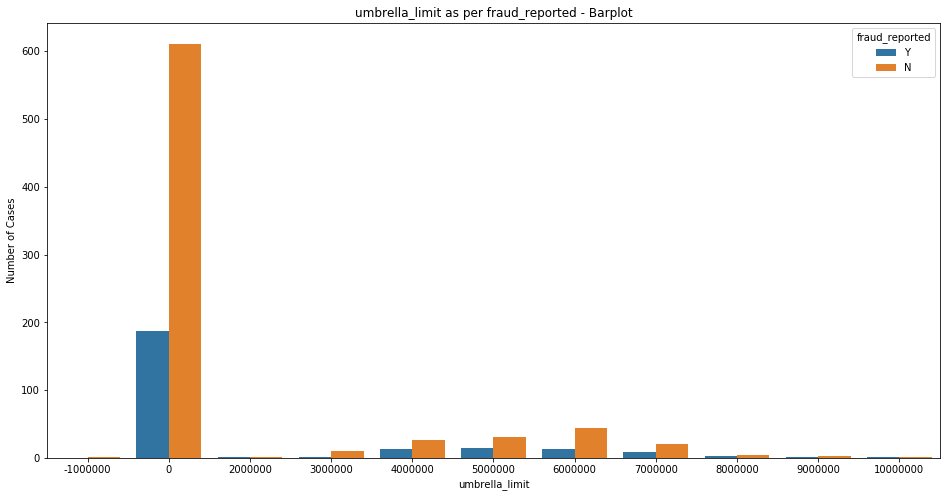

In [373]:
plt.figure(figsize=(16,8))
sns.countplot(x="umbrella_limit",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('umbrella_limit as per fraud_reported - Barplot')

Fraud cases are present across all umbrella limits

Text(0.5, 1.0, 'Gender wise fraud_reported - Barplot')

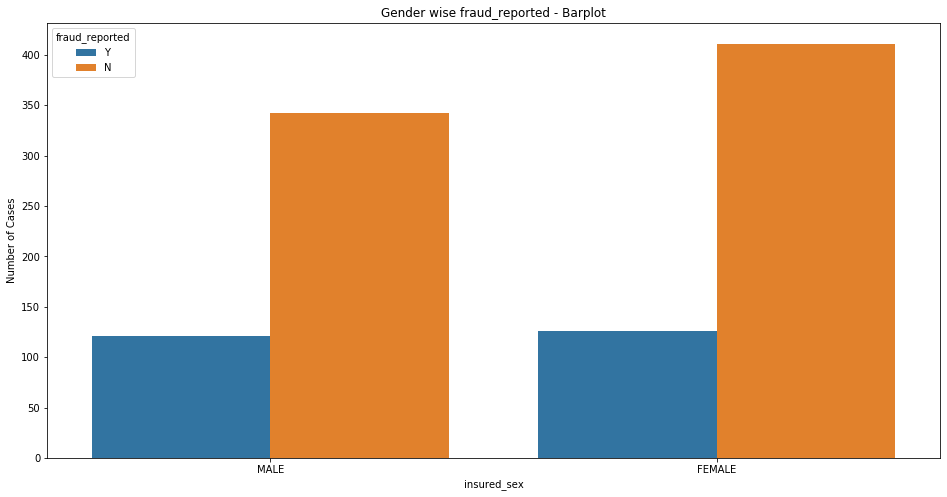

In [374]:
plt.figure(figsize=(16,8))
sns.countplot(x="insured_sex",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('Gender wise fraud_reported - Barplot')

Males have a relatively higher proportion of insurance frauds

Text(0.5, 1.0, 'education_level wise fraud_reported - Barplot')

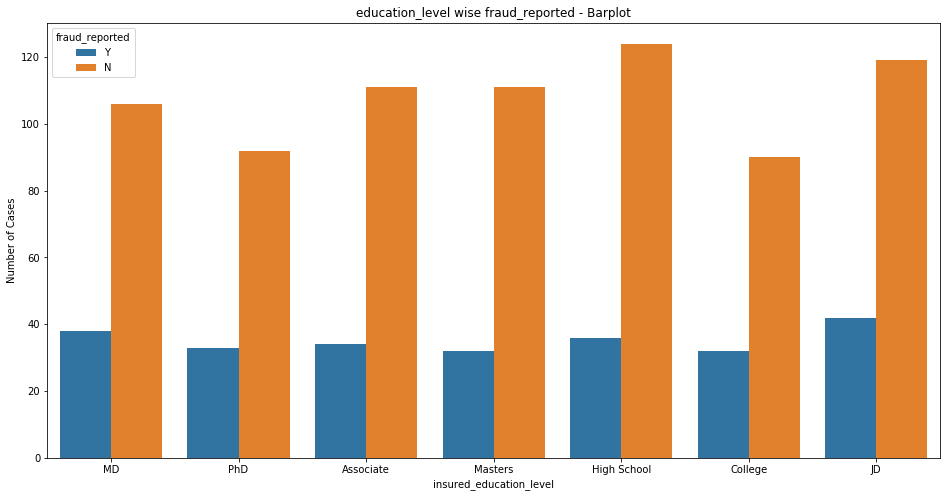

In [375]:
plt.figure(figsize=(16,8))
sns.countplot(x="insured_education_level",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('education_level wise fraud_reported - Barplot')

Insurance fraud does not depend on the education level of the claimant

Text(0.5, 1.0, 'occupation wise fraud_reported - Barplot')

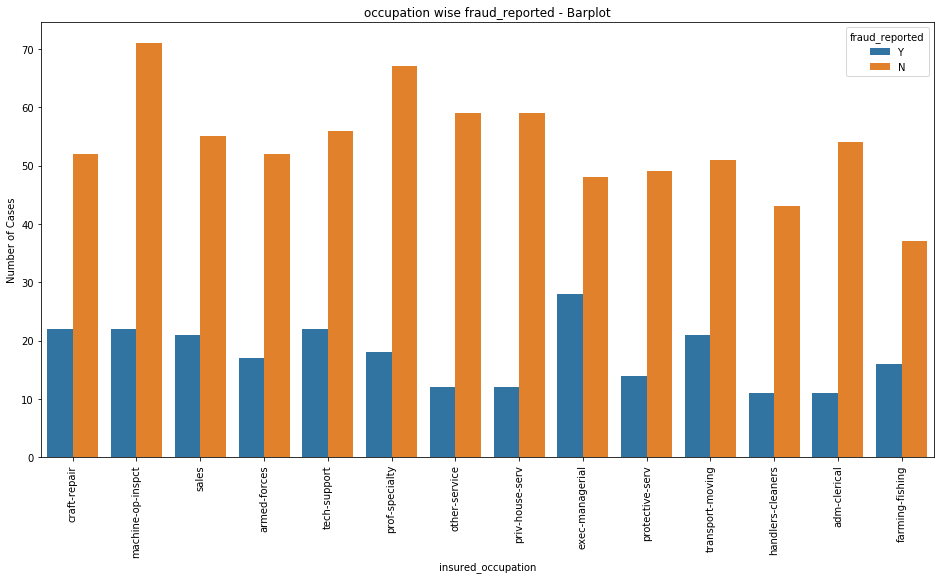

In [376]:
plt.figure(figsize=(16,8))
sns.countplot(x="insured_occupation",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.title('occupation wise fraud_reported - Barplot')

The proportion of fraud claims is highest for occupation category exec-managerial, also it is very low for adm-clerical

Text(0.5, 1.0, 'hobby wise fraud_reported - Barplot')

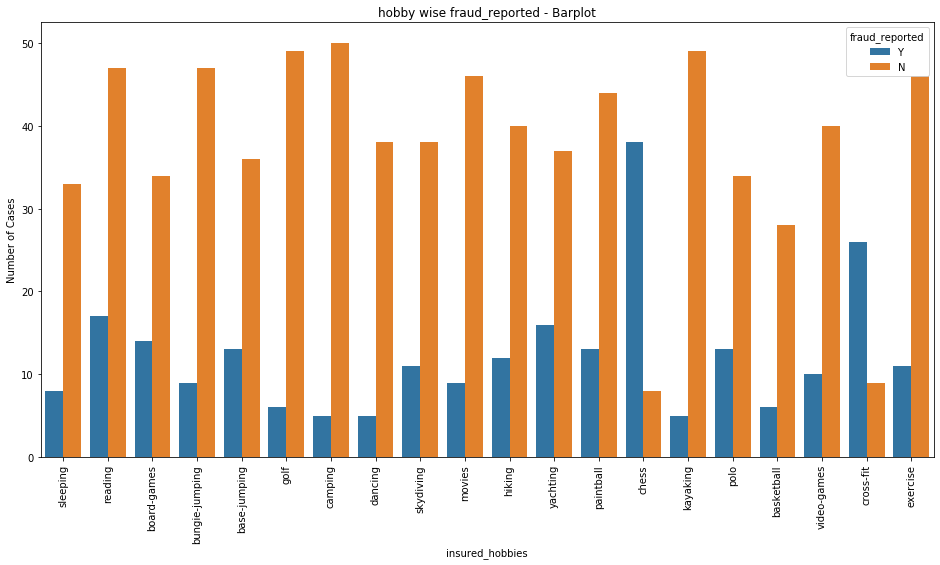

In [377]:
plt.figure(figsize=(16,8))
sns.countplot(x="insured_hobbies",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.title('hobby wise fraud_reported - Barplot')

Majority of the claims filed by people who had chess or cross fit as hobby, were fraud. Also people who liked camping or kayaking made very less fraud claims

Text(0.5, 1.0, 'relationship wise fraud_reported - Barplot')

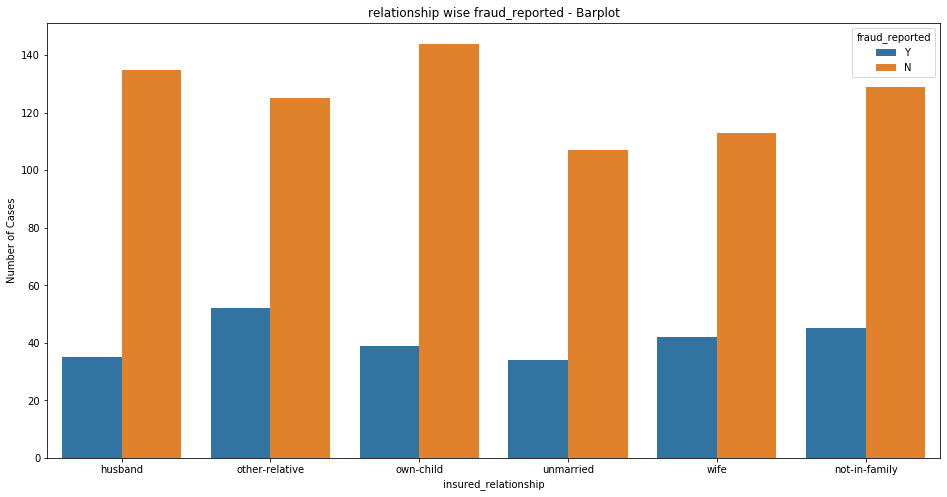

In [378]:
plt.figure(figsize=(16,8))
sns.countplot(x="insured_relationship",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('relationship wise fraud_reported - Barplot')

Fraud claims are present in all relationship categories

Text(0.5, 1.0, 'fraud_reported vs capital-gains - Boxplot')

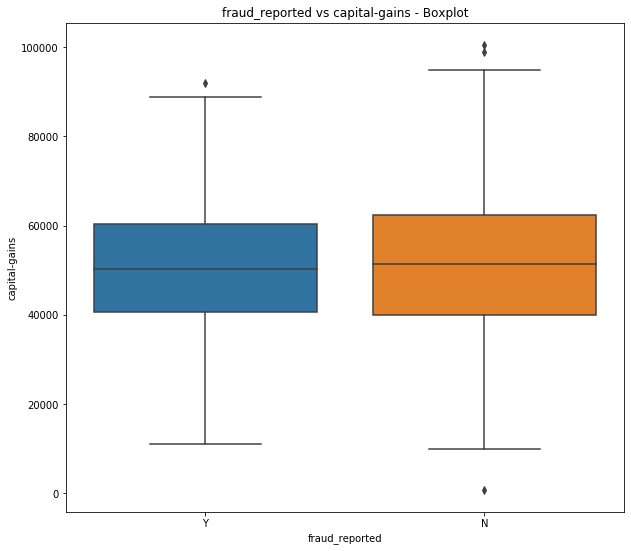

In [379]:
plt.figure(figsize=(10,9))
sns.boxplot(x="fraud_reported", y="capital-gains",data=gain)
plt.title('fraud_reported vs capital-gains - Boxplot')

Fruad claims does not depend on gains made through investments

Text(0.5, 1.0, 'fraud_reported vs capital-loss - Boxplot')

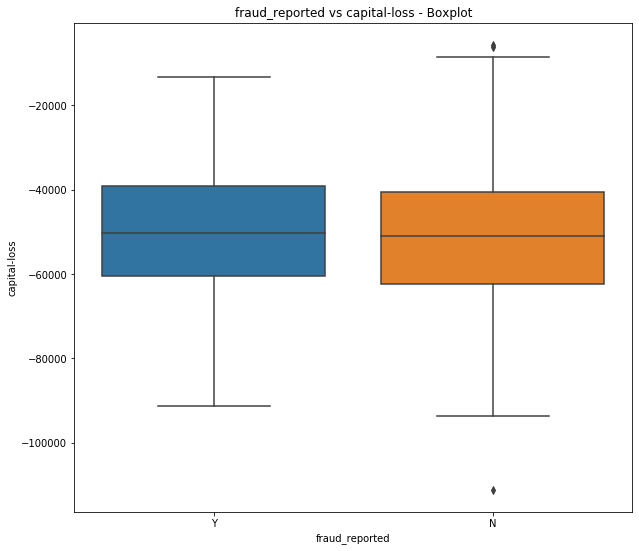

In [380]:
plt.figure(figsize=(10,9))
sns.boxplot(x="fraud_reported", y="capital-loss",data=loss)
plt.title('fraud_reported vs capital-loss - Boxplot')

Fruad claims does not depend on losses incurred in investments

Text(0.5, 1.0, 'incident_type wise fraud_reported - Barplot')

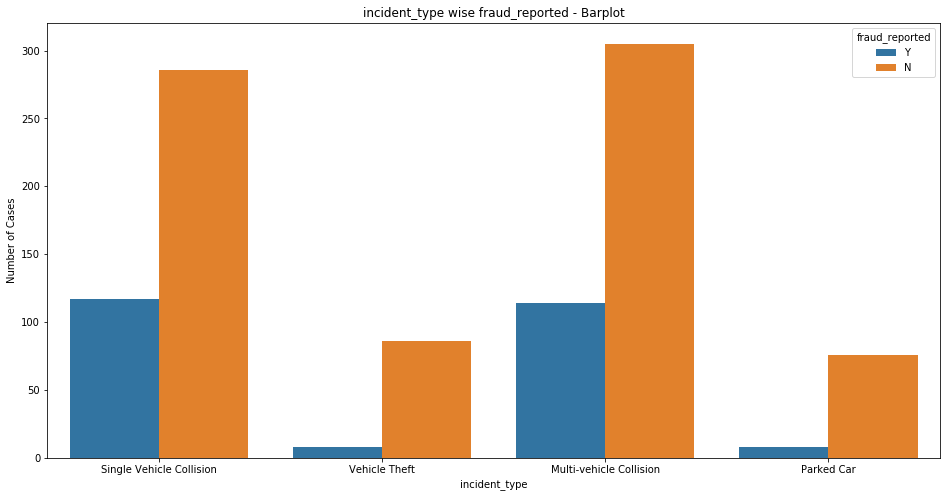

In [381]:
plt.figure(figsize=(16,8))
sns.countplot(x="incident_type",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('incident_type wise fraud_reported - Barplot')

Majority of fraud claims were made for incidents of single vehicle & multi vehicle collision

Text(0.5, 1.0, 'collision_type wise fraud_reported - Barplot')

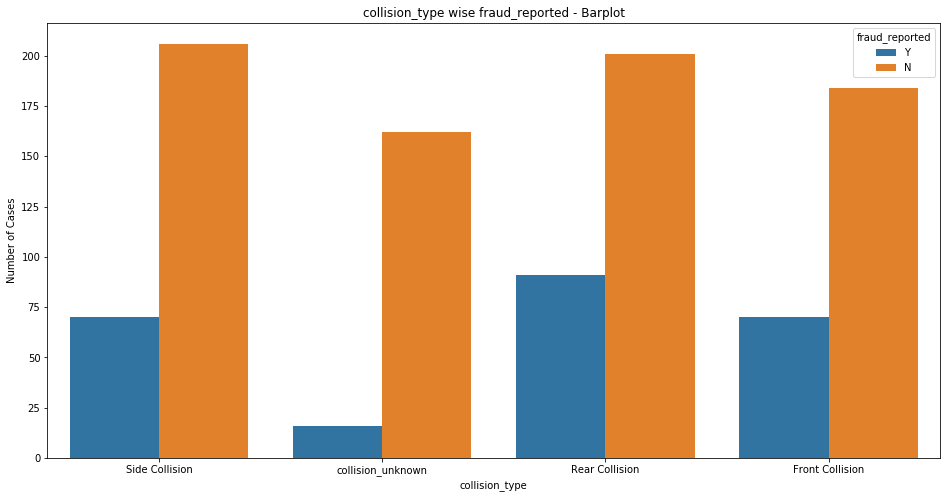

In [382]:
plt.figure(figsize=(16,8))
sns.countplot(x="collision_type",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('collision_type wise fraud_reported - Barplot')

Highest number of fraud claims were made in rear type collision

Text(0.5, 1.0, 'incident_severity wise fraud_reported - Barplot')

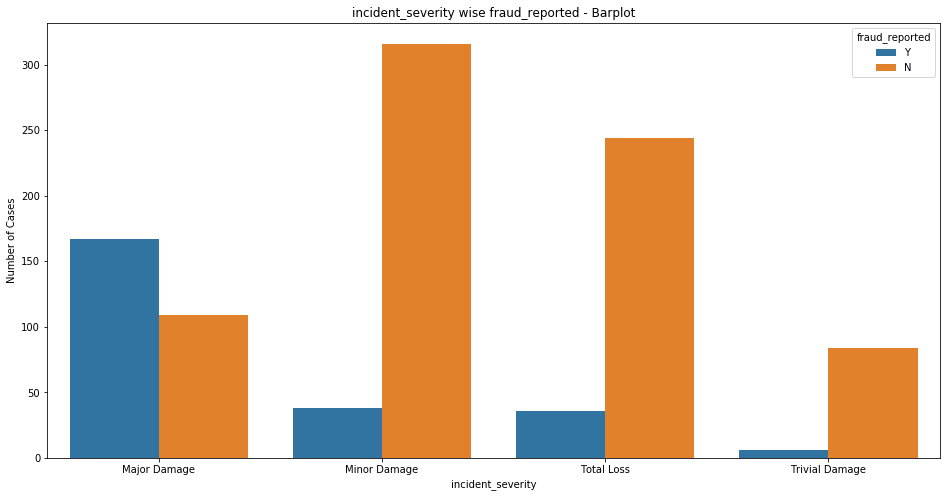

In [383]:
plt.figure(figsize=(16,8))
sns.countplot(x="incident_severity",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('incident_severity wise fraud_reported - Barplot')

Majority of the claims made under major damage incident severity category were false, also very few fraud cases were made under trivial damage category

Text(0.5, 1.0, 'authorities_contacted wise fraud_reported - Barplot')

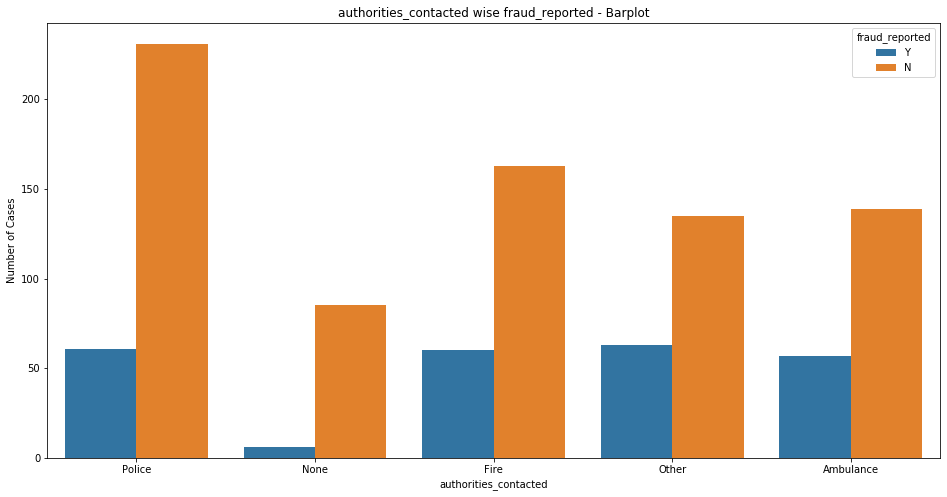

In [384]:
plt.figure(figsize=(16,8))
sns.countplot(x="authorities_contacted",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('authorities_contacted wise fraud_reported - Barplot')

Proportion of fraud claims were relatively lesses where police were contacted

Text(0.5, 1.0, 'incident_state wise fraud_reported - Barplot')

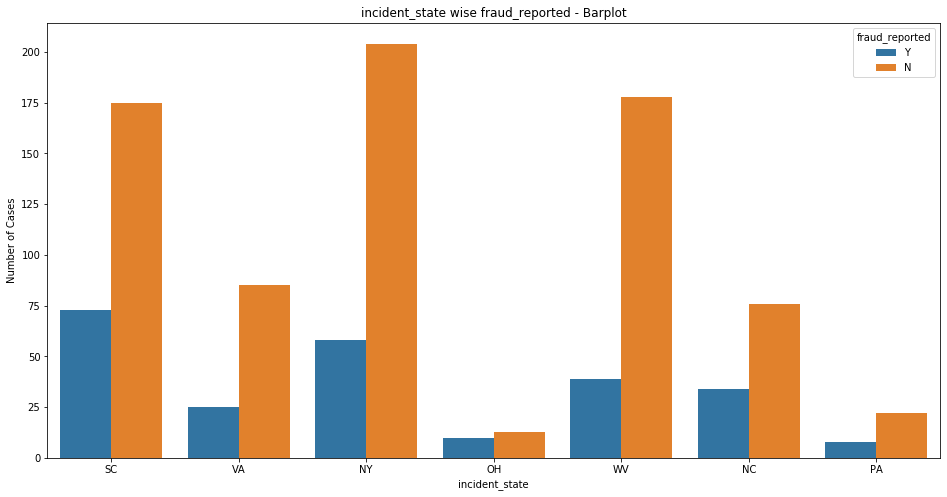

In [385]:
plt.figure(figsize=(16,8))
sns.countplot(x="incident_state",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('incident_state wise fraud_reported - Barplot')

Most of the fraud claims were had incident state SC, also almost half the reported claims were fraud for incident satate OH

Text(0.5, 1.0, 'incident_city wise fraud_reported - Barplot')

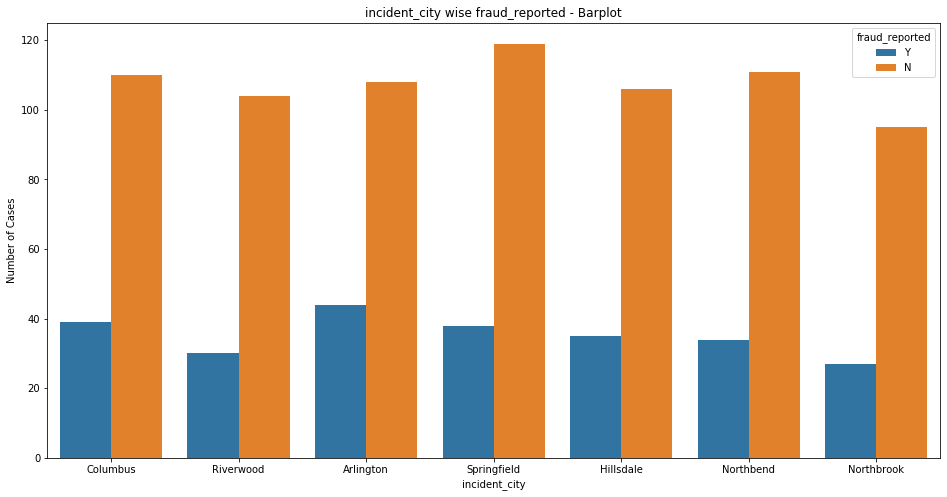

In [386]:
plt.figure(figsize=(16,8))
sns.countplot(x="incident_city",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('incident_city wise fraud_reported - Barplot')

Highest number of fraud claims had incident city - Arlington followed by Columbus, least were made in Northbrook followed by Riverwood

Text(0.5, 1.0, 'incident_hour_of_the_day wise fraud_reported - Barplot')

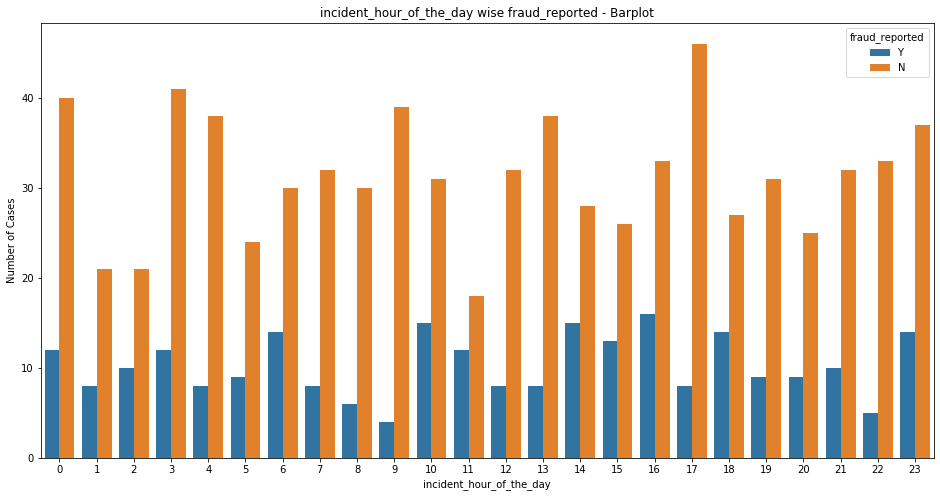

In [387]:
plt.figure(figsize=(16,8))
sns.countplot(x="incident_hour_of_the_day",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('incident_hour_of_the_day wise fraud_reported - Barplot')

Least number of fraud claims were made around incident hour 9AM and most around 4AM

Text(0.5, 1.0, 'number_of_vehicles_involved wise fraud_reported - Barplot')

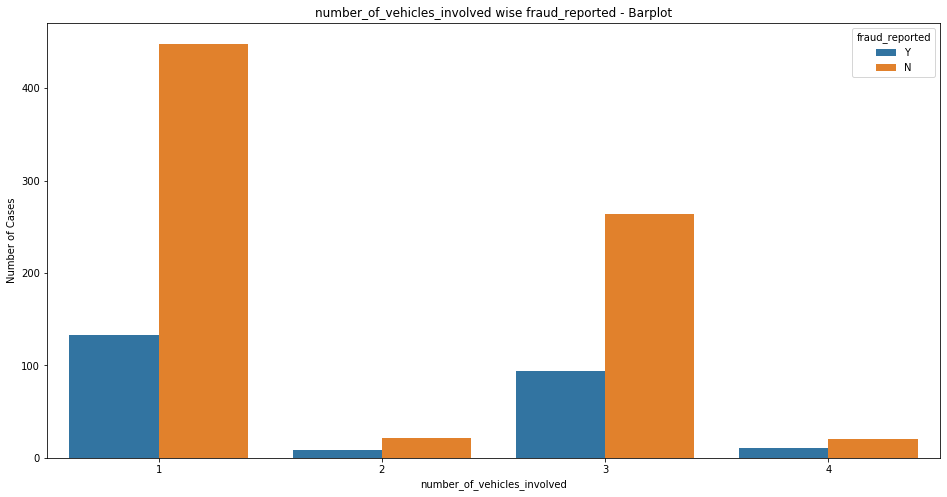

In [388]:
plt.figure(figsize=(16,8))
sns.countplot(x="number_of_vehicles_involved",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('number_of_vehicles_involved wise fraud_reported - Barplot')

fraud claims are present in all categories of number of vehicle involved

Text(0.5, 1.0, 'property_damage wise fraud_reported - Barplot')

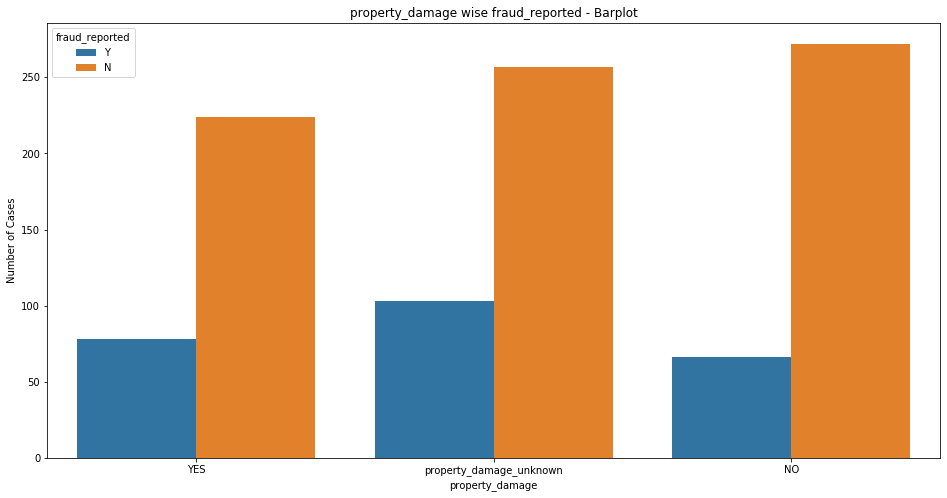

In [389]:
plt.figure(figsize=(16,8))
sns.countplot(x="property_damage",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('property_damage wise fraud_reported - Barplot')

proportion of fraud cases are relatively higher for claims with property damage compared to with no property damage

Text(0.5, 1.0, 'bodily_injuries wise fraud_reported - Barplot')

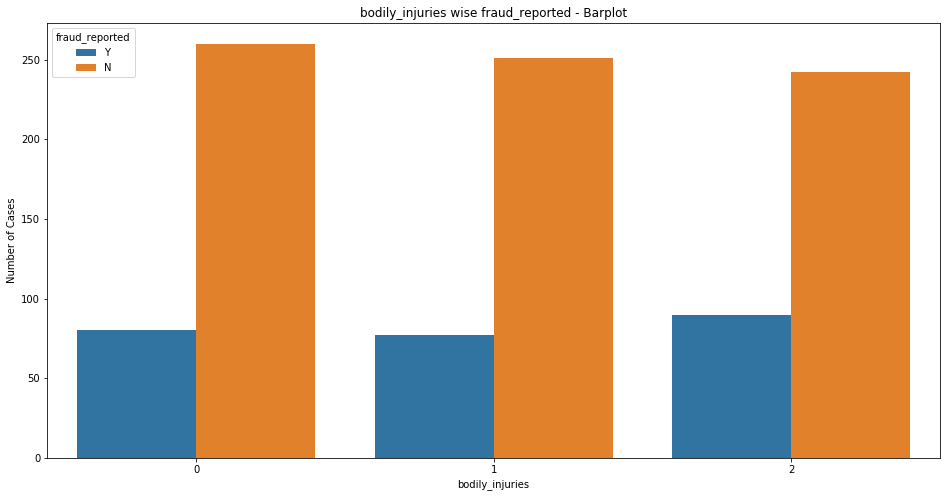

In [390]:
plt.figure(figsize=(16,8))
sns.countplot(x="bodily_injuries",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('bodily_injuries wise fraud_reported - Barplot')

proportion of fraud cases are relatively higher for bodily injuries 2 compared to others

Text(0.5, 1.0, 'witnesses wise fraud_reported - Barplot')

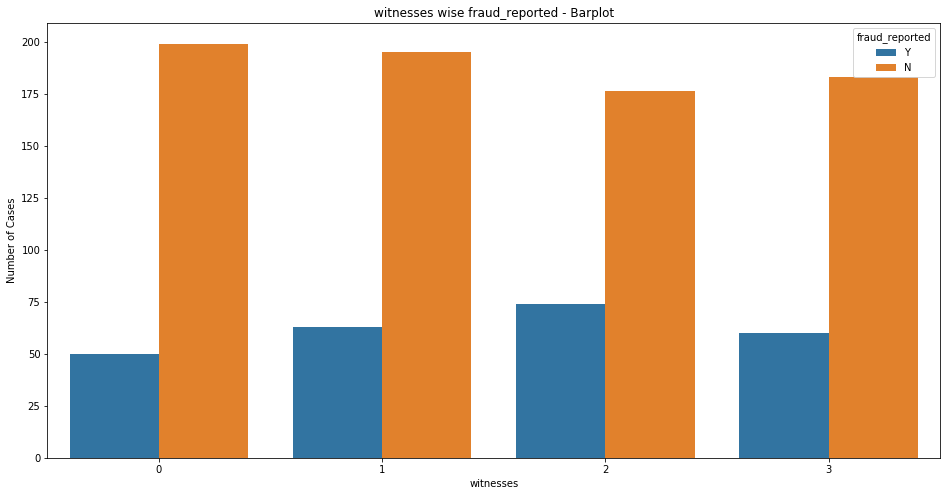

In [391]:
plt.figure(figsize=(16,8))
sns.countplot(x="witnesses",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('witnesses wise fraud_reported - Barplot')

proportion of fraud cases are relatively higher for incident with 2 witnesses compared to others

Text(0.5, 1.0, 'police_report_available wise fraud_reported - Barplot')

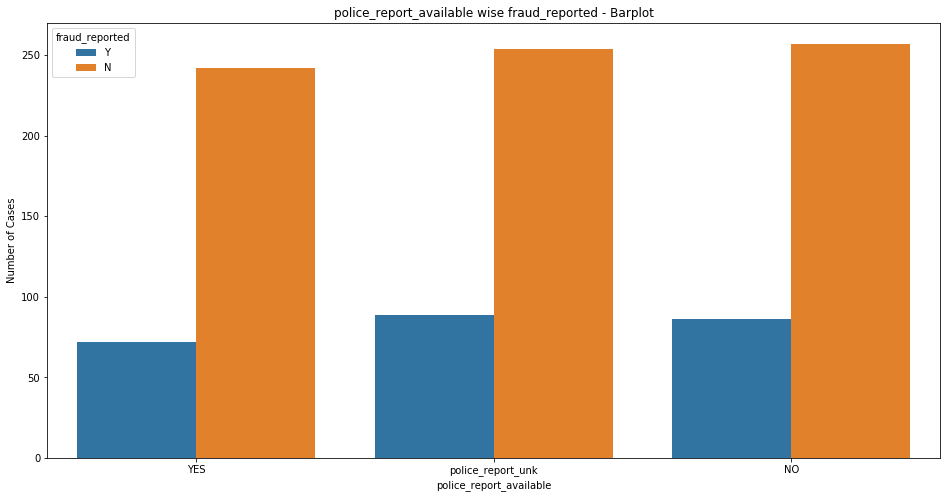

In [392]:
plt.figure(figsize=(16,8))
sns.countplot(x="police_report_available",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('police_report_available wise fraud_reported - Barplot')

Lesser fraud claims were made for incidents where police reports were available

Text(0.5, 1.0, 'fraud_reported vs total_claim_amount - Boxplot')

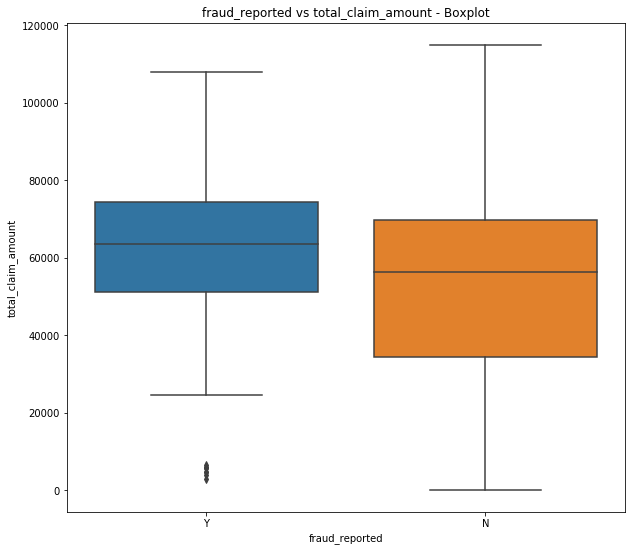

In [393]:
plt.figure(figsize=(10,9))
sns.boxplot(x="fraud_reported", y="total_claim_amount",data=loss)
plt.title('fraud_reported vs total_claim_amount - Boxplot')

Fraud claims have relatively higher total claim amounts

Text(0.5, 1.0, 'fraud_reported vs injury_claim - Boxplot')

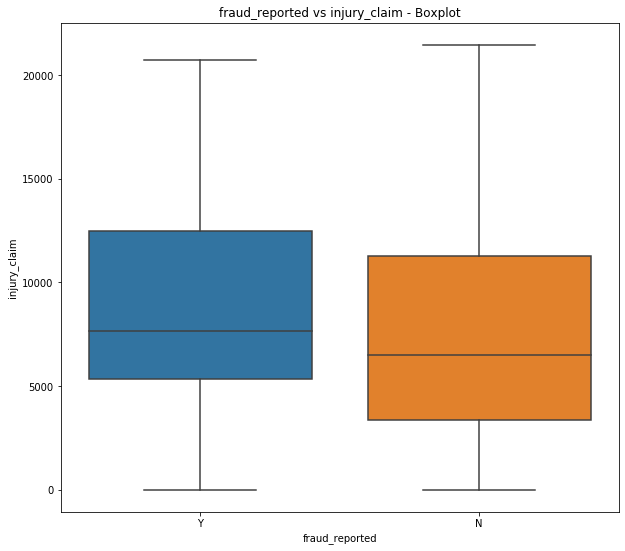

In [394]:
plt.figure(figsize=(10,9))
sns.boxplot(x="fraud_reported", y="injury_claim",data=loss)
plt.title('fraud_reported vs injury_claim - Boxplot')

Fraud claims have relatively higher injury claims

Text(0.5, 1.0, 'fraud_reported vs property_claim - Boxplot')

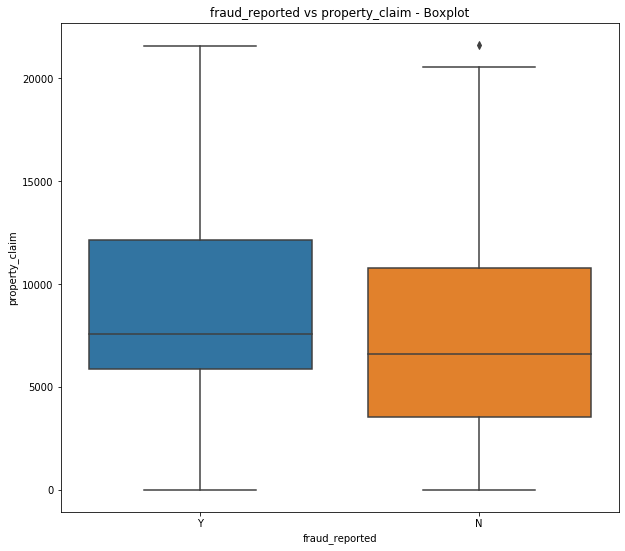

In [395]:
plt.figure(figsize=(10,9))
sns.boxplot(x="fraud_reported", y="property_claim",data=loss)
plt.title('fraud_reported vs property_claim - Boxplot')

Fraud claims have relatively higher property claims

Text(0.5, 1.0, 'fraud_reported vs vehicle_claim - Boxplot')

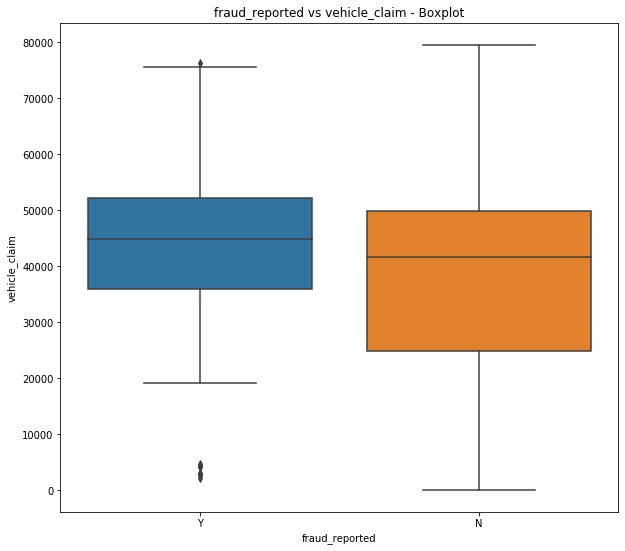

In [396]:
plt.figure(figsize=(10,9))
sns.boxplot(x="fraud_reported", y="vehicle_claim",data=loss)
plt.title('fraud_reported vs vehicle_claim - Boxplot')

Fraud claims have relatively higher vehicle claims

Text(0.5, 1.0, 'auto_make wise fraud_reported - Barplot')

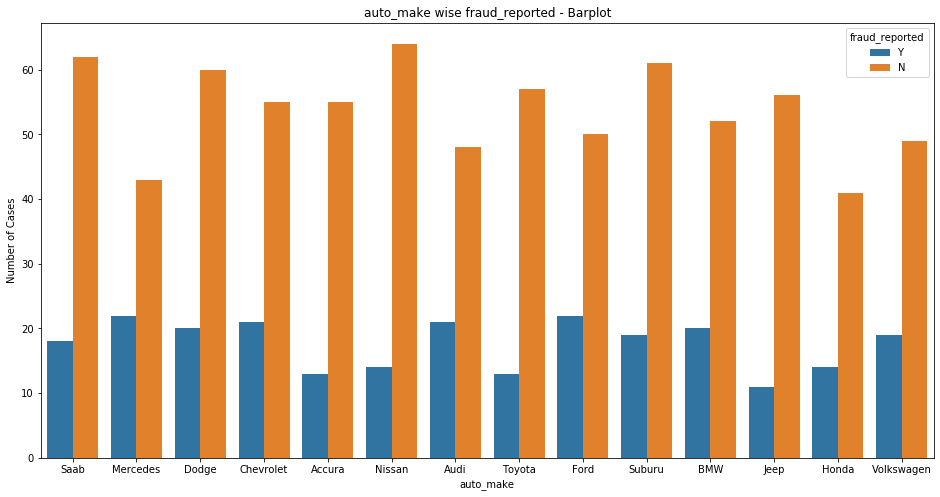

In [397]:
plt.figure(figsize=(16,8))
sns.countplot(x="auto_make",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('auto_make wise fraud_reported - Barplot')

Highest number of fraud claims were made by owners of auto make - Ford and least by Jeep

Text(0.5, 1.0, 'auto_model wise fraud_reported - Barplot')

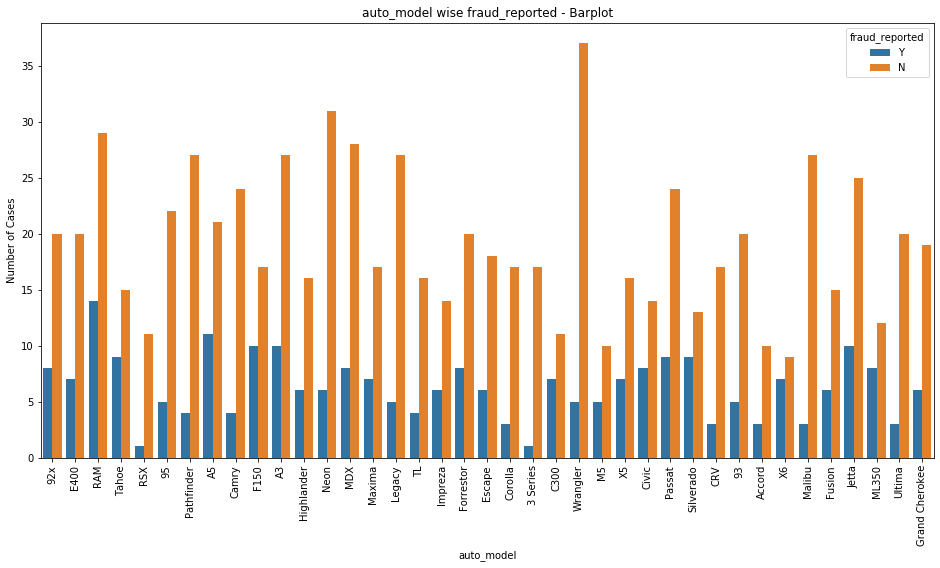

In [398]:
plt.figure(figsize=(16,8))
sns.countplot(x="auto_model",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.title('auto_model wise fraud_reported - Barplot')

Highest number of fraud claims were made by owners of RAM & least by RSX and 3 series

Text(0.5, 1.0, 'auto_year wise fraud_reported - Barplot')

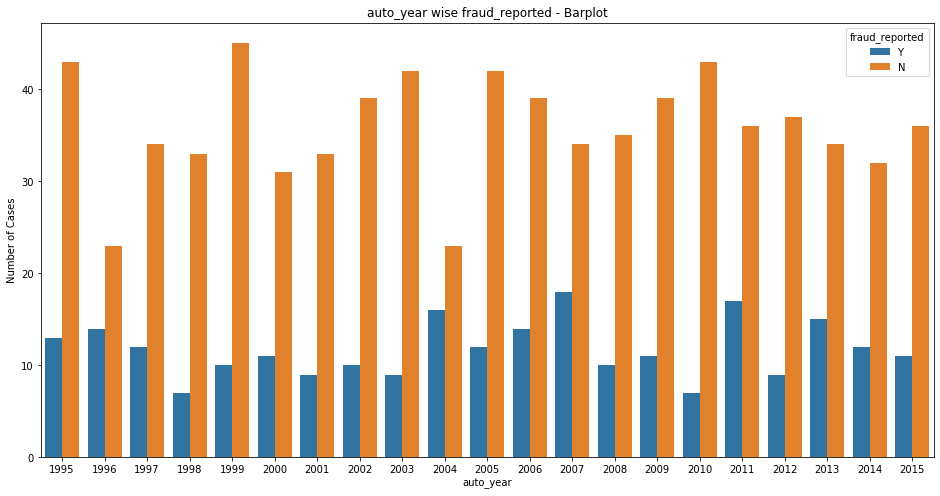

In [399]:
plt.figure(figsize=(16,8))
sns.countplot(x="auto_year",hue="fraud_reported", data = df1)
plt.ylabel('Number of Cases')
plt.title('auto_year wise fraud_reported - Barplot')

Highest numner of fraud cases were made by owners of auto manufactured in 2002 and least in 2010

In [400]:
#Let's look at the null values present in the dataset
df1.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

In [401]:
df1.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [402]:
cat = pd.get_dummies(df1)
cat

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported_N,fraud_reported_Y
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0,0,0,0,0,0,0,0,0,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,0,0,0,0,0,0,0,0,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,0,0,0,0,0,0,0,1,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,1,0,0,0,0,0,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,0,0,0,0,0,0,0,0,1,0
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,0,0,0,0,0,0,0,0,1,0
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,0,0,0,0,0,0,0,0,1,0
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,0,0,0,0,0,0,0,0,1,0


In [403]:
cat.shape

(1000, 163)

In [404]:
cat.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries',
       ...
       'auto_model_RSX', 'auto_model_Silverado', 'auto_model_TL',
       'auto_model_Tahoe', 'auto_model_Ultima', 'auto_model_Wrangler',
       'auto_model_X5', 'auto_model_X6', 'fraud_reported_N',
       'fraud_reported_Y'],
      dtype='object', length=163)

In [405]:
cat.drop(["policy_state_IL","policy_csl_100/300","insured_sex_MALE","insured_education_level_MD","insured_occupation_craft-repair","insured_hobbies_sleeping","insured_relationship_other-relative","incident_type_Single Vehicle Collision","collision_type_collision_unknown","incident_severity_Major Damage","authorities_contacted_None","incident_state_SC","incident_city_Columbus","property_damage_property_damage_unknown","police_report_available_police_report_unk","auto_make_Saab","auto_model_92x"],axis=1,inplace=True)

In [406]:
cat.shape

(1000, 146)

In [407]:
cat.drop("fraud_reported_N",axis=1,inplace=True)

In [408]:
cat.shape

(1000, 145)

In [409]:
X=cat.drop("fraud_reported_Y", axis=1)
y=cat["fraud_reported_Y"]

In [410]:
#Scaling
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[ 1.07813958,  0.99083647, -0.22238259, ..., -0.20938323,
        -0.15343224, -0.12751534],
       [ 0.2089946 ,  0.33407345,  1.41278352, ..., -0.20938323,
        -0.15343224, -0.12751534],
       [-0.60800168, -1.08891308,  1.41278352, ..., -0.20938323,
        -0.15343224, -0.12751534],
       ...,
       [-0.64276748, -0.54161057, -1.03996564, ..., -0.20938323,
        -0.15343224, -0.12751534],
       [ 2.20802805,  2.52328351,  1.41278352, ..., -0.20938323,
        -0.15343224, -0.12751534],
       [ 2.19064515,  2.3043625 , -0.22238259, ..., -0.20938323,
        -0.15343224, -0.12751534]])

Let's do Principal Component Analysis (PCA) for the input features

In [411]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X2)
X_pca = pca.transform(X2)
print("Original shape: {}".format(str(X2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (1000, 144)
Reduced shape: (1000, 10)


Finding the best random state

In [412]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_accuracy_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.25,random_state=r_state)
    logr = LogisticRegression()
    logr.fit(X_train,y_train)
    y_pred = logr.predict(X_test)
    accu_scr = accuracy_score(y_test,y_pred)
    if accu_scr>max_accuracy_score:
        max_accuracy_score = accu_scr
        final_r_state = r_state
    
print("max accuracy score corresponding to random state",final_r_state,"is",max_accuracy_score)

max accuracy score corresponding to random state 16 is 0.86


In [208]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.25,random_state=16)

In [209]:
print(X_train.shape,"\n",X_test.shape)

(750, 144) 
 (250, 144)


Observing performance of different classifier algorithms

In [210]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [211]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
GNB = GaussianNB()
#MNB = MultinomialNB()
#SV = SVC()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier() #from the GridsearchCV parameter tuning performed later
XGB = xgb.XGBClassifier()

In [212]:
models = []
models.append(("LogisticRegression", LR))
models.append(("KNeighborsClassifier", KNN))
models.append(("GaussianNB", GNB))
#models.append(("MultinomialNB", MNB))
#models.append(("SVC", SV))
models.append(("DecisionTreeClassifier", DTC))
models.append(("RandomForestClassifier", RFC))
models.append(("AdaBoostClassifier", ABC))
models.append(("GradientBoostingClassifier", GBC))
models.append(("XGBoostClassifier", XGB))

In [213]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, random_state=16, shuffle=True)

***************** LogisticRegression ******************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score =  0.86


Cross val score =  0.75


roc_auc_score =  0.7748139608007546


Classification Report
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       203
           1       0.62      0.64      0.63        47

    accuracy                           0.86       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.86      0.86      0.86       250



Confusion Matrix 
[[185  18]
 [ 17  30]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** KNeighborsClassifier ******************

KNeighborsClassifier(algor

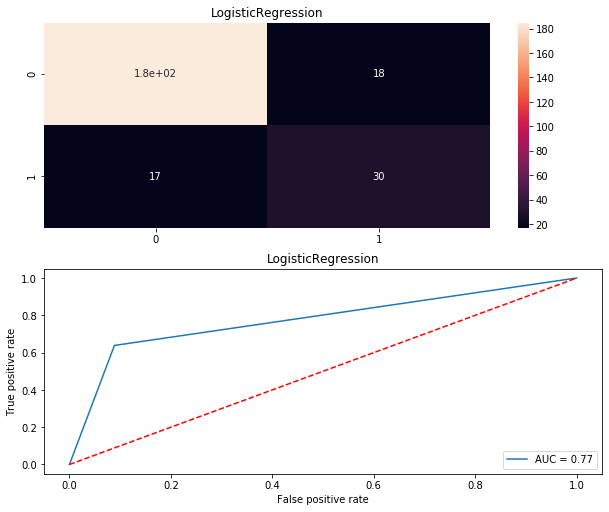

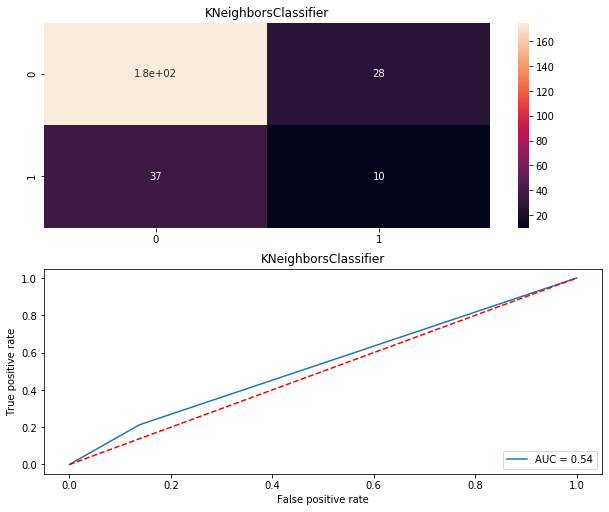

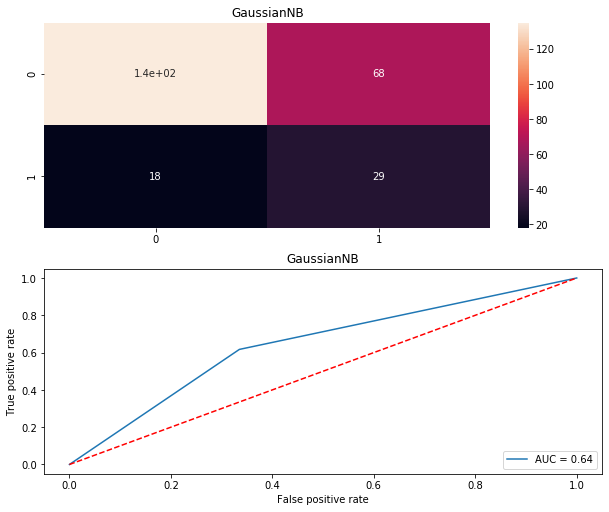

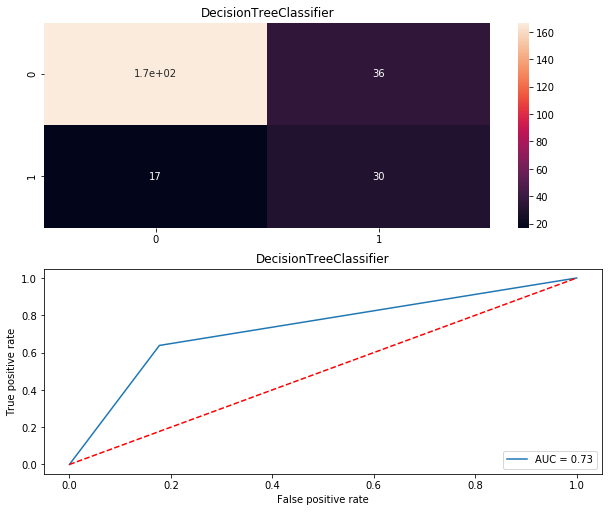

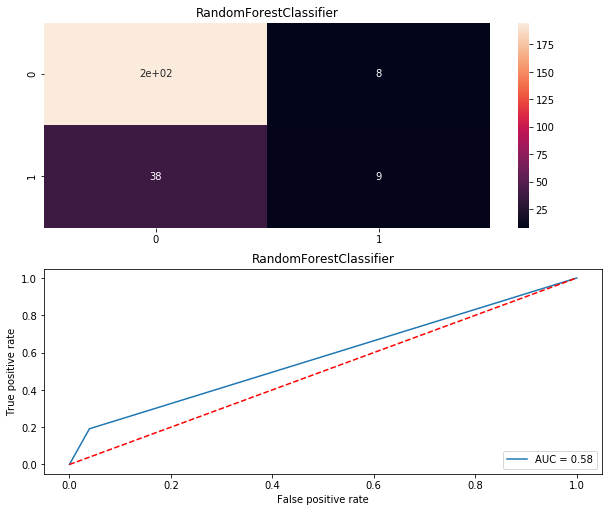

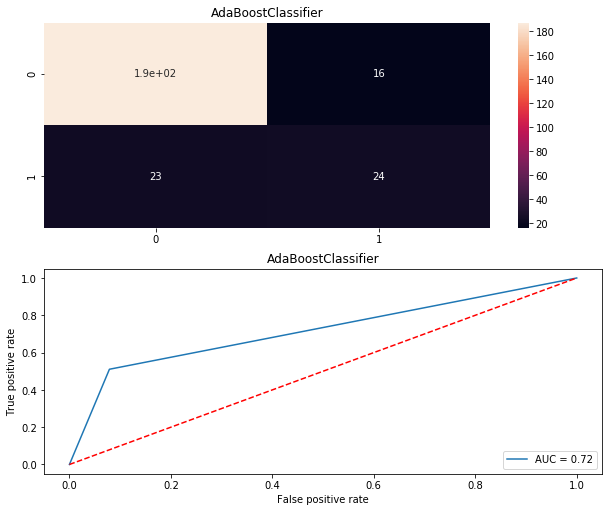

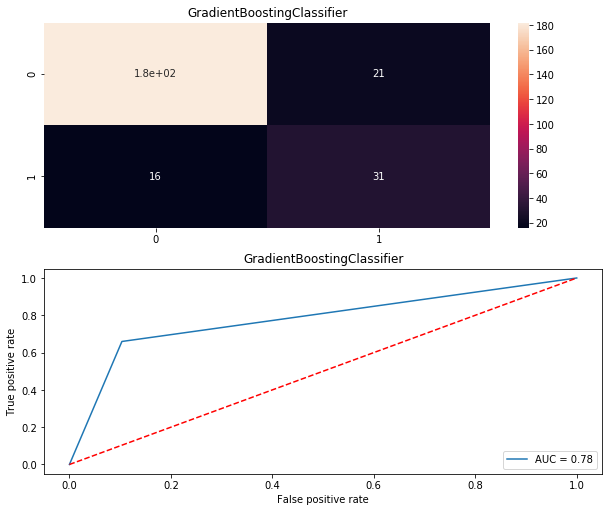

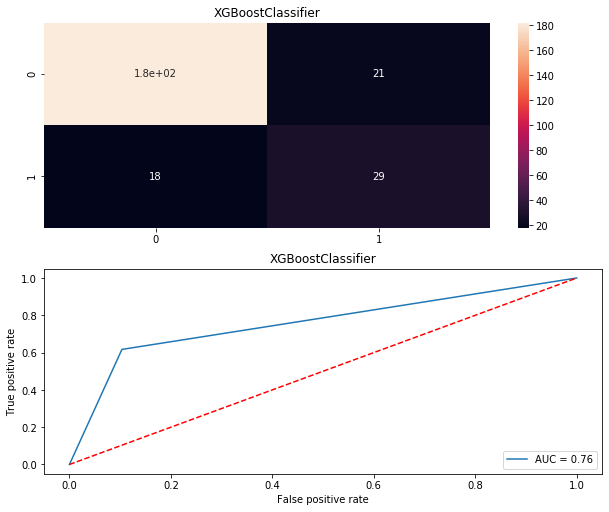

In [214]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    AS = accuracy_score(y_test,pre)
    print("Accuracy Score = ",AS)
    score.append(AS*100)
    print("\n")
    sc = cross_val_score(model,X,y,cv=10,scoring="accuracy").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print("Classification Report\n", classification_report(y_test,pre))
    print("\n")
    cm = confusion_matrix(y_test,pre)
    print("Confusion Matrix \n{}".format(cm))
    print("\n")
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")

In [215]:
result = pd.DataFrame({"Model": Model, "Accuracy Socre": score, "Cross val score": cvs, 'ROC AUC Curve': rocscore})
result

,Model,Accuracy Socre,Cross val score,ROC AUC Curve
0,LogisticRegression,86.0,75.0,77.481396
1,KNeighborsClassifier,74.0,70.8,53.741746
2,GaussianNB,65.6,67.9,64.102295
3,DecisionTreeClassifier,78.8,76.7,73.047899
4,RandomForestClassifier,81.6,75.5,57.604025
5,AdaBoostClassifier,84.4,79.7,71.591028
6,GradientBoostingClassifier,85.2,81.7,77.806310
7,XGBoostClassifier,84.4,81.2,75.678650


Clearly Gradient Boosting Classifier gives the best generalization performance so let's find the best parameter for it

In [191]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [80],
            'learning_rate': [0.05,0.1,0.15]
             }
grid = GridSearchCV(estimator=GBC,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

Setting the parameters and retraining the model with new parameters

In [216]:
GBC1 = GradientBoostingClassifier(n_estimators=80,learning_rate=0.1)
GBC1.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [217]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(GBC1,'Insurance_Fraud_Prediction.pkl')

['Insurance_Fraud_Prediction.pkl']